# Описание проекта

Данный проект создан в образовательных целях и используется в разделе Хакатон на программе Data Science в медицине, разработанной совместно Skillfactoty и ФГАОУ ВО Первый МГМУ им. И.М. Сеченова Минздрава России (Сеченовский Университет).

Цель проекта - распознавание результатов общего анализа крови.

Данная задача от компании «Наносемантика».

Краткое описание задач проекта:
1. Цель — разработать сервис, который анализирует загруженные результаты общего анализа крови на основе данных и выдает рекомендацию о необходимости обратиться к определенному врачу с указанием срочности.

2. На основе переданных результатов анализов для обучения сделать эталонный датасет.


3. Усложнение задачи: встроить сервис в браузер, сделав облачным и доступным по ссылке.


# Метаморфозы датасета

## Загрузка датасета и основных библиотек

In [2]:
# Импорт основных библиотек
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

In [3]:
# Загрузка файла из Google Disk
! gdown --id 1445e7B7eJpo3pqmgfKxX6l00DblzLC6-

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1445e7B7eJpo3pqmgfKxX6l00DblzLC6-
To: /content/undefind_DSMED.csv
100% 8.33M/8.33M [00:00<00:00, 25.9MB/s]


In [4]:
# Загрузка датасета
blood = pd.read_csv('/content/undefind_DSMED.csv', sep=';')
# Создание рабочей копии для сохранения оригинальных данных
blood_copy = blood.copy()

In [5]:
# Вывод первых 50 записей датасета
blood_copy.head(50)

ID истории болезни Осн. диаг. при выписке МКБ10 (текст)  \
0   2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
1   2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
2   2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
3   2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
4   2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
5   2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
6   2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
7   2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
8   2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
9   2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
10  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
11  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
12  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
13  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
14  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
15  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
16  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
17  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
18  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
19  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
20  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
21  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
22  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
23  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
24  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
25  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
26  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
27  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
28  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
29  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
30  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
31  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
32  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
33  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
34  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
35  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
36  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
37  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
38  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
39  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
40  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
41  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
42  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
43  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
44  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
45  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
46  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
47  2e1d0b3f-488a-11ed-ab5a-0050568844e6               Плазмоклеточный лейкоз   
48  2e1d0b3f-488a-11ed-ab5a-0050568844e6             

In [6]:
# Вывод общей информации
display(blood_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36297 entries, 0 to 36296
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID истории болезни                    36297 non-null  object 
 1   Осн. диаг. при выписке МКБ10 (текст)  36297 non-null  object 
 2   Заголовок документа                   36297 non-null  object 
 3   Кол. лаб. показатель                  36236 non-null  object 
 4   Значение кол. показателя              36236 non-null  float64
 5   Ед. изм. кол. показателя              36236 non-null  object 
 6   Норма кол. показателя                 36236 non-null  object 
 7   Флаг нормы кол. показателя            36236 non-null  object 
 8   Кач. лаб. показатель                  7005 non-null   object 
 9   Значение кач. показателя              7005 non-null   object 
 10  Норма кач. показателя                 7005 non-null   object 
 11  Пол            

None

Промежуточный вывод:

Данный датасет состоит из 13 признаков и 36297 строк. В подавляющем большинстве - данные представлены строковыми значениями, только значение "Значение кол. показателя" - числами с плавающей точкой. Сразу видно, что для некоторых признаков обнаруживается колоссальное количество пропусков. Для корректной работы с датасетом необходимо произвести разведочный анализ данных.

## Реализация разведочного анализа данных - (EDA).

Для первичной оценки представленных данных целесообразно воспользоваться статистическими методами.

In [7]:
# Отображение статистических показателей для строковых данных
display(blood_copy.describe(include='object'))

# Отображение статистических показателей для количественных данных
display(blood_copy.describe())

ID истории болезни  \
count                                  36297   
unique                                   243   
top     c1f452ff-d091-11ee-8606-005056880ecb   
freq                                     662   

       Осн. диаг. при выписке МКБ10 (текст) Заголовок документа  \
count                                 36297               36297   
unique                                   11                   1   
top                Другой уточненный лейкоз  Общий анализ крови   
freq                                  24424               36297   

       Кол. лаб. показатель Ед. изм. кол. показателя Норма кол. показателя  \
count                 36236                    36236                 36236   
unique                  131                       11                   123   
top        Гемоглобин (HGB)                        %                 18:44   
freq                   1114                    15116                  2135   

       Флаг нормы кол. показателя Кач. лаб. показатель  \
count                       36236                 7005   
unique                          4                    7   
top                          Норм          Комментарий   
freq                        21218                 4563   

       Значение кач. показателя Норма кач. показателя    Пол  \
count                      7005                  7005  36297   
unique                      155                     5      2   
top                           +                     _      Ж   
freq                       1250                  4563  19966   

       Дата рождения пациента  
count                   36297  
unique                    104  
top       1939-02-06 00:00:00  
freq                     5828

Значение кол. показателя
count              36236.000000
mean                  41.696821
std                   99.307102
min                    0.000000
25%                    2.000000
50%                   11.300000
75%                   38.900000
max                 2958.000000

Описание статистических показателей:
1. Признак "ID историй болезни" - из 36297 строк 243 уникальных, значит на одного пациента приходится более одного анализа крови, при этом пациент с ID 'c1f452ff-d091-11ee-8606-005056880ecb' сдал 662 анализа. При этом признак "Дата рождения пациента" уникальный только в 104 случаях, следовательно либо наши пациенты одной даты рождения, либо на некоторых пациентов заведено более одной истории болезни.
2. Признак "Осн. диаг. при выписке МКБ10 (текст)" - всего 11 вариантов выставленных диагнозов, самый часто встречающийся из которых - Другой уточненный лейкоз (24424 раза). Лейкозы - клональные злокачественные заболевания кроветворной системы, на них нельзя ориентироваться для построения модели для условно здоровой популяции.
3. Признак "Флаг нормы кол. показателя" - имеет 4 уникальных значения, в подавляющем большинстве случаев (21218 раз) встречается норма.
4. Признак "Пол" - 55% (19966) - женщины, 45% (16331) - мужчины.
5. Признаки "Кол. лаб. показатель", "Ед. изм. кол. показателя", "Норма кол. показателя", "Кач. лаб. показатель", "Значение кач. показателя", "Норма кач. показателя" -  не несут ценной информации, три последних к тому же представлены только 7005 раз из 36297.
6. Признак "Заголовок документа" - единый во всех строках.
7. Признак "Значение кол. показателя" также не имеет статистической ценности, так как представлен разными системами измерений.

----------

Для наших данных полезно посмотреть, какими именно уникальными значениями они представлены.

In [8]:
# Уникальные значения во всех столбцах
display(blood_copy.nunique())

ID истории болезни                       243
Осн. диаг. при выписке МКБ10 (текст)      11
Заголовок документа                        1
Кол. лаб. показатель                     131
Значение кол. показателя                2608
Ед. изм. кол. показателя                  11
Норма кол. показателя                    123
Флаг нормы кол. показателя                 4
Кач. лаб. показатель                       7
Значение кач. показателя                 155
Норма кач. показателя                      5
Пол                                        2
Дата рождения пациента                   104
dtype: int64

Наиболее значимы для оценки уникальные значения в следующих столбцах:

In [9]:
display(blood_copy['Осн. диаг. при выписке МКБ10 (текст)'].unique())

array(['Плазмоклеточный лейкоз', 'Другой уточненный лейкоз',
       'Острый лимфобластный лейкоз', 'Хронический лимфоцитарный лейкоз',
       'Волосатоклеточный лейкоз', 'Острый миелоидный лейкоз',
       'Хронический миелоидный лейкоз', 'Острый миеломоноцитарный лейкоз',
       'Другой миелоидный лейкоз',
       'Другой лейкоз неуточненного клеточного типа',
       'Острый лейкоз неуточненного клеточного типа'], dtype=object)

Данный датасет исключительно лейкемический. Все диагнозы представлены различными типами лейкозов.

Лейкоз - клональное (онкологическое) злокачественное заболевание кроветворной системы. Наши данные представлены, как очень агрессивными формами - Острым лимфобластным лейкозом (ОЛЛ), Острым миелоидным лейкозом (ОМЛ), Острым миеломоноцитарным лейкозом (ОММЛ), Острый лейкоз неуточненного клеточного типа (ОЛНКТ); хроническими или вялотекущими формами - Плазмоклеточный лейкоз, Хронический лимфоцитарный лейкоз (ХЛЛ), Волосатоклеточный лейкоз, Хронический миелоидный лейкоз (ХМЛ); и другими формами лейкозов - Другой уточненный лейкоз, Другой миелоидный лейкоз, Другой лейкоз неуточненного клеточного типа.
       
Основываясь на градациях тяжести заболеваний, можно разработать модель мультиклассовой классификации или сделать score-оценку по степени срочности обращения к врачу.

In [10]:
display(blood_copy['Кол. лаб. показатель'].unique())

array(['Лейкоциты (WBC)', 'Эритроциты (RBC)', 'Гемоглобин (HGB)',
       'Гематокрит (HCT)', 'Средний объем эритроцита (MCV)',
       'Среднее содержание гемоглобина в эритроците (MCH)',
       'Средняя концентрация гемоглобина в эритроците (MCHC)',
       'Тромбоциты (PLT)', 'Нейтрофилы, относительное количество (NE%)',
       'Лимфоциты, относительное количество (LY%)',
       'Нейтрофилы, абсолютное количество (NE#)',
       'Лимфоциты, абсолютное количество (LY#)',
       'Смешанная фракция, абсолютное количество (MXD#)',
       'Смешанная фракция, относительное количество (MXD%)',
       'Ширина распределения эритроцитов по объему, коэффициент вариации (RDW-CV)',
       'Ширина распределения эритроцитов по объему, стандартное отклонение (RDW-SD)',
       'Ширина распределения эритроцитов по объему (RDW)',
       'Тромбокрит (PCT)', 'Средний объем тромбоцита (MPV)',
       'Ширина распределения тромбоцитов (PDW)',
       'Моноциты, относительное количество (MO%)',
       'Эозинофил

Данный датасет состоит из большого разнообразия наименований различных показателей крови, дублирующих друг друга и требующих приведения к единому виду.

In [11]:
display(blood_copy['Ед. изм. кол. показателя'].unique())

array(['10*9/л', '10*12/л', 'г/л', '%', 'фл', 'пг', 'г/дл', '_', 'мм/час',
       'fL', nan, 'FL'], dtype=object)

Для единиц измерения крови использованы верные обозначения.

In [12]:
display(blood_copy['Флаг нормы кол. показателя'].unique())

array(['Пониж', 'Норм', 'Повыш', nan, 'Норма'], dtype=object)

Данные флаги показывают соответвие показателя заданному референсу.

In [13]:
display(blood_copy['Значение кач. показателя'].unique())

array([nan, 'плазматические клетки с омоложением ядра',
       'из 34 моноцитоидных элементов 9 промоноцитов',
       'микроагрегаты тромбоцитов отсутствуют. тромбоциты при подсчете по мазку - 75х10*9/л',
       'из 14 моноцитоидных элементов 8 промоноциты, тромбоциты по мазку  соответствуют счету анализатора.',
       'микроагрегаты тромбоцитов не обнаружены. тромбоциты при подсчете по мазку - 51х10*9/л',
       '+', '++', 'мишеневидные эритроциты',
       'встречаются плазматические клетки с омоложенными ядрами',
       'сгусток крови!', 'тромбоциты по мазку 62х10*9/л,', 'Сгусток',
       'из 24 моноцитоидных элементов 16 промоноцитов', 'проверено',
       'тромбоциты проверены по мазку', 'сгусток крови',
       'клетки лейколиза в умеренном количестве',
       'встречаются микросгустки тромбоцитов',
       'микроагрегаты тромбоцитов отсутствуют, тромбоциты при подсчете по мазку - 70х10*9/л',
       'тромбоциты по мазку 81х10*9/л',
       'встречаются полихроматофильные эритроциты.',

Данный признак "Значение кач. показателя" имеет большое количество пропусков 7005 заполненных строк против 36297 всех строк (80,7% пропусков), что неизбежно отрицательно скажется на обучении модели.

In [14]:
display(blood_copy['Пол'].unique())

array(['Ж', 'М'], dtype=object)

В данном датасете представлены только мужчины и женщины.

In [15]:
# Кодирование полового признака: 1 - женский пол, 0 - мужской.
blood_copy['Пол'] = blood_copy['Пол'].apply(lambda x: 0 if x.strip() == 'М' else (1 if x.strip() == 'Ж' else np.nan))

Для перевода признака "Дата рождения пациента" в "Возраст" необходимо воспользоваться datetime.

In [16]:
from datetime import datetime
blood_copy['Дата рождения пациента'] = pd.to_datetime(blood_copy['Дата рождения пациента'])
blood_copy['Возраст'] = (datetime.now() - blood_copy['Дата рождения пациента']).dt.days // 365

Для приведения показателей крови к единой системе наименований:

In [17]:
dict_lab = {
# Лейкоциты
    'Лейкоциты (WBC)': 'Лейкоциты',
    'Лейкоциты': 'Лейкоциты',
    'WBC': 'Лейкоциты',
    'Общее количество лейкоцитов (WBC)': 'Лейкоциты',
    'Общее количество лейкоцитов': 'Лейкоциты',

# Эритроциты
    'Эритроциты (RBC)': 'Эритроциты',
    'Эритроциты': 'Эритроциты',
    'RBC': 'Эритроциты',
    'Общее количество эритроцитов (RBC)': 'Эритроциты',
    'Общее количество эритроцитов': 'Эритроциты',

    # Гемоглобин
    'Гемоглобин (HGB)': 'Гемоглобин',
    'Гемоглобин': 'Гемоглобин',
    'HGB': 'Гемоглобин',

    # Гематокрит
    'Гематокрит (HCT)': 'Гематокрит',
    'Гематокрит': 'Гематокрит',
    'HCT': 'Гематокрит',

    # Тромбоциты
    'Тромбоциты (PLT)': 'Тромбоциты',
    'Тромбоциты': 'Тромбоциты',
    'PLT': 'Тромбоциты',

    # СОЭ
    'СОЭ Вест.': 'СОЭ по Вестергрену',
    'Скорость оседания эритроцитов (СОЭ) по Вестергрену': 'СОЭ по Вестергрену',
    'СОЭ по Панченкову': 'СОЭ по Панченкову',
    'СОЭ Панч.': 'СОЭ по Панченкову',

    # Эритроцитарные индексы
    'Средний объем эритроцита (MCV)': 'Средний объем эритроцита',
    'Средний объем эритроцита': 'Средний объем эритроцита',
    'MCV': 'Средний объем эритроцита',

    'Среднее содержание гемоглобина в эритроците (MCH)': 'Среднее содержание гемоглобина в эритроците',
    'Среднее содержание гемоглобина в эритроците': 'Среднее содержание гемоглобина в эритроците',
    'MCH': 'Среднее содержание гемоглобина в эритроците',

    'Средняя концентрация гемоглобина в эритроците (MCHC)': 'Средняя концентрация гемоглобина в эритроците',
    'Средняя концентрация гемоглобина в эритроците': 'Средняя концентрация гемоглобина в эритроците',
    'MCHC': 'Средняя концентрация гемоглобина в эритроците',

    # Тромбоцитарные индексы
    'Тромбокрит (PCT)': 'Тромбокрит',
    'Тромбокрит': 'Тромбокрит',
    'PCT': 'Тромбокрит',

    'Средний объем тромбоцита (MPV)': 'Средний объем тромбоцита',
    'Средний объем тромбоцита': 'Средний объем тромбоцита',
    'MPV': 'Средний объем тромбоцита',
    'MPV (Средний объём тромбоцитов)': 'Средний объем тромбоцита',

    'Ширина распределения тромбоцитов (PDW)': 'Ширина распределения тромбоцитов',
    'Ширина распределения тромбоцитов': 'Ширина распределения тромбоцитов',
    'PDW': 'Ширина распределения тромбоцитов',

    # Лейкоцитарная формула (относительные %)
    'Нейтрофилы, относительное количество (NE%)': 'Нейтрофилы',
    'Нейтрофилы, относительное количество': 'Нейтрофилы',
    'NE%': 'Нейтрофилы',
    'Нейтрофилы %': 'Нейтрофилы',
    'Относительное количество нейтрофилов (NE%)': 'Нейтрофилы',

    'Лимфоциты, относительное количество (LY%)': 'Лимфоциты',
    'Лимфоциты, относительное количество': 'Лимфоциты',
    'LY%': 'Лимфоциты',
    'Лимфоциты %': 'Лимфоциты',
    'Относительное количество лимфоцитов (LY%)': 'Лимфоциты',

    'Моноциты, относительное количество (MO%)': 'Моноциты',
    'Моноциты, относительное количество': 'Моноциты',
    'MO%': 'Моноциты',
    'Моноциты %': 'Моноциты',
    'Относительное количество моноцитов (MO%)': 'Моноциты',

    'Эозинофилы, относительное количество (EO%)': 'Эозинофилы',
    'Эозинофилы, относительное количество': 'Эозинофилы',
    'EO%': 'Эозинофилы',
    'Эозинофилы %': 'Эозинофилы',
    'Относительное количество эозинофилов (EO%)': 'Эозинофилы',

    'Базофилы, относительное количество (BA%)': 'Базофилы',
    'Базофилы, относительное количество': 'Базофилы',
    'BA%': 'Базофилы',
    'Базофилы %': 'Базофилы',
    'Относительное количество базофилов (BA%)': 'Базофилы',

    # Лейкоцитарная формула (абсолютные #)
    'Нейтрофилы, абсолютное количество (NE#)': 'Нейтрофилы абс.',
    'Нейтрофилы, абсолютное количество': 'Нейтрофилы абс.',
    'NE#': 'Нейтрофилы абс.',
    'Нейтрофилы #': 'Нейтрофилы абс.',
    'Абсолютное количество нейтрофилов (NE#)': 'Нейтрофилы абс.',

    'Лимфоциты, абсолютное количество (LY#)': 'Лимфоциты абс.',
    'Лимфоциты, абсолютное количество': 'Лимфоциты абс.',
    'LY#': 'Лимфоциты абс.',
    'Лимфоциты #': 'Лимфоциты абс.',
    'Абсолютное количество лимфоцитов (LY#)': 'Лимфоциты абс.',

    'Моноциты, абсолютное количество (MO#)': 'Моноциты абс.',
    'Моноциты, абсолютное количество': 'Моноциты абс.',
    'MO#': 'Моноциты абс.',
    'Моноциты #': 'Моноциты абс.',
    'Абсолютное количество моноцитов (MO#)': 'Моноциты абс.',

    'Эозинофилы, абсолютное количество (EO#)': 'Эозинофилы абс.',
    'Эозинофилы, абсолютное количество': 'Эозинофилы абс.',
    'EO#': 'Эозинофилы абс.',
    'Эозинофилы #': 'Эозинофилы абс.',
    'Эозинофилы # ': 'Эозинофилы абс.',
    'Абсолютное количество эозинофилов (EO#)': 'Эозинофилы абс.',

    'Базофилы, абсолютное количество (BA#)': 'Базофилы абс.',
    'Базофилы, абсолютное количество': 'Базофилы абс.',
    'BA#': 'Базофилы абс.',
    'Базофилы #': 'Базофилы абс.',
    'Базофилы # ': 'Базофилы абс.',
    'Абсолютное количество базофилов (BA#)': 'Базофилы абс.',

    # Прочие показатели
    'Цветовой показатель': 'Цветовой показатель',
    'Палочкоядерные': 'Палочкоядерные',
    'Сегментоядерные': 'Сегментоядерные',
    'Плазматические клетки': 'Плазматические клетки',
    'Плазматич. клетки': 'Плазматические клетки',
    'Бласты': 'Бласты',
    'Пролимфоциты': 'Пролимфоциты',
    'Промиелоциты': 'Промиелоциты',
    'Миелоциты': 'Миелоциты',
    'Юные': 'Юные',
    'Нормобласты': 'Нормобласты',
    'Нормобласты %': 'Нормобласты',
    'Нормобласты #': 'Нормобласты',

    # Ретикулоциты
    'RET%': 'Ретикулоциты',
    'Ретикулоциты кол-во': 'Ретикулоциты',
    'Ретикулоциты %': 'Ретикулоциты',

    # Смешанные фракции
    'Смешанная фракция, относительное количество (MXD%)': 'Смешанная фракция',
    'Смешанная фракция, относительное количество': 'Смешанная фракция',
    'MXD%': 'Смешанная фракция',
    'MXD': 'Смешанная фракция',

    'Смешанная фракция, абсолютное количество (MXD#)': 'Смешанная фракция абс.',
    'Смешанная фракция, абсолютное количество': 'Смешанная фракция абс.',
    'MXD#': 'Смешанная фракция абс.',
    'MXD# ': 'Смешанная фракция абс.',

    # Распределение эритроцитов
    'Ширина распределения эритроцитов по объему (RDW)': 'RDW',
    'Ширина распределения эритроцитов': 'RDW',
    'RDW': 'RDW',

    'Ширина распределения эритроцитов по объему, коэффициент вариации (RDW-CV)': 'RDW-CV',
    'RDW-CV': 'RDW-CV',
    'RDW-CV ': 'RDW-CV',

    'Ширина распределения эритроцитов по объему, стандартное отклонение (RDW-SD)': 'RDW-SD',
    'RDW-SD': 'RDW-SD',

    # Прочие
    'P-LCR': 'P-LCR',
    'Неклассифицируемые кол-во': 'Неклассифицируемые',
    'Неклассифицируемые %': 'Неклассифицируемые'
}

In [18]:
def change_lab_name(name):
    """
    Преобразует название лабораторного показателя согласно словарю соответствий.

    Функция проверяет входящее название показателя и заменяет его
    на стандартизированное название из словаря dict_lab, если такое
    соответствие существует с проверкой на NaN.

    Параметры:
        name (str): Исходное название лабораторного показателя

    Возвращает:
        str или None:
            - Стандартизированное название из dict_lab, если найдено соответствие
            - Исходное название, если соответствие не найдено
            - None, если входное значение равно NaN

    """
    # Проверка на NaN
    if pd.isna(name):
        return None

    if name in dict_lab:
        return dict_lab[name]

    return name

In [19]:
# Применение функции change_lab_name для датасета
blood_copy['Кол. лаб. показатель'] = blood_copy['Кол. лаб. показатель'].apply(change_lab_name)

In [20]:
# Проверка приведенных к стандарту лабораторных показателей
display(blood_copy['Кол. лаб. показатель'].unique())

array(['Лейкоциты', 'Эритроциты', 'Гемоглобин', 'Гематокрит',
       'Средний объем эритроцита',
       'Среднее содержание гемоглобина в эритроците',
       'Средняя концентрация гемоглобина в эритроците', 'Тромбоциты',
       'Нейтрофилы', 'Лимфоциты', 'Нейтрофилы абс.', 'Лимфоциты абс.',
       'Смешанная фракция абс.', 'Смешанная фракция', 'RDW-CV', 'RDW-SD',
       'RDW', 'Тромбокрит', 'Средний объем тромбоцита',
       'Ширина распределения тромбоцитов', 'Моноциты', 'Эозинофилы',
       'Базофилы', 'Моноциты абс.', 'Эозинофилы абс.', 'Базофилы абс.',
       'Цветовой показатель', 'СОЭ по Вестергрену', 'Палочкоядерные',
       'Сегментоядерные', 'Плазматические клетки', 'Миелоциты', 'Юные',
       'Бласты', 'Нормобласты',
       'Ширина распределения эритроцитов по объему, стандартное отклонение',
       'Ширина распределения эритроцитов по объему, коэффициент вариации',
       'Ширина распределения тромбоцитов по объему',
       'Средний объём тромбоцитов', 'Ретикулоциты',
      

Обработка пропущенных значений:

In [21]:
# Оценка количества пропущенных значений
blood_copy.isna().sum()

ID истории болезни                          0
Осн. диаг. при выписке МКБ10 (текст)        0
Заголовок документа                         0
Кол. лаб. показатель                       61
Значение кол. показателя                   61
Ед. изм. кол. показателя                   61
Норма кол. показателя                      61
Флаг нормы кол. показателя                 61
Кач. лаб. показатель                    29292
Значение кач. показателя                29292
Норма кач. показателя                   29292
Пол                                         0
Дата рождения пациента                      0
Возраст                                     0
dtype: int64

Как уже было описано выше наибольшее количество пропусков у признаков "Кач. лаб. показатель" - 29292, "Значение кач. показателя" - 29292, "Норма кач. показателя" - 29292, это 80,7% пропущенных значений.

In [22]:
# Удаление признака 'Дата рождения пациента'
blood_copy.drop('Дата рождения пациента', axis=1)

ID истории болезни  \
0      2e1d0b3f-488a-11ed-ab5a-0050568844e6   
1      2e1d0b3f-488a-11ed-ab5a-0050568844e6   
2      2e1d0b3f-488a-11ed-ab5a-0050568844e6   
3      2e1d0b3f-488a-11ed-ab5a-0050568844e6   
4      2e1d0b3f-488a-11ed-ab5a-0050568844e6   
...                                     ...   
36292  516f652e-8bb8-11eb-bb95-2cea7fe73f75   
36293  516f652e-8bb8-11eb-bb95-2cea7fe73f75   
36294  516f652e-8bb8-11eb-bb95-2cea7fe73f75   
36295  516f652e-8bb8-11eb-bb95-2cea7fe73f75   
36296  516f652e-8bb8-11eb-bb95-2cea7fe73f75   

              Осн. диаг. при выписке МКБ10 (текст) Заголовок документа  \
0                           Плазмоклеточный лейкоз  Общий анализ крови   
1                           Плазмоклеточный лейкоз  Общий анализ крови   
2                           Плазмоклеточный лейкоз  Общий анализ крови   
3                           Плазмоклеточный лейкоз  Общий анализ крови   
4                           Плазмоклеточный лейкоз  Общий анализ крови   
...                                            ...                 ...   
36292  Острый лейкоз неуточненного клеточного типа  Общий анализ крови   
36293  Острый лейкоз неуточненного клеточного типа  Общий анализ крови   
36294  Острый лейкоз неуточненного клеточного типа  Общий анализ крови   
36295  Острый лейкоз неуточненного клеточного типа  Общий анализ крови   
36296  Острый лейкоз неуточненного клеточного типа  Общий анализ крови   

           Кол. лаб. показатель  Значение кол. показателя  \
0                     Лейкоциты                      1.80   
1                    Эритроциты                      4.18   
2                    Гемоглобин                    120.00   
3                    Гематокрит                     35.10   
4      Средний объем эритроцита                     84.00   
...                         ...                       ...   
36292                  Базофилы                      1.00   
36293                Эозинофилы                      0.00   
36294              Пролимфоциты                      0.00   
36295                 Лимфоциты                     65.00   
36296                  Моноциты                      1.00   

      Ед. изм. кол. показателя Норма кол. показателя  \
0                       10*9/л                  4:11   
1                      10*12/л               3,8:5,7   
2                          г/л               117:160   
3                            %                 35:47   
4                           фл                 80:99   
...                        ...                   ...   
36292                        %                   0:2   
36293                        %                   0:5   
36294                        %                   0:0   
36295                        %                 18:44   
36296                        %                  2:12   

      Флаг нормы кол. показателя Кач. лаб. показатель  \
0                          Пониж                  NaN   
1                           Норм                  NaN   
2                           Норм                  NaN   
3                           Норм                  NaN   
4                           Норм                  NaN   
...                          ...                  ...   
36292                       Норм          Комментарий   
36293                       Норм          Комментарий   
36294                       Норм          Комментарий   
36295                      Повыш          Комментарий   
36296                      Пониж          Комментарий   

                                Значение кач. показателя  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
36292  Тромбоциты проверены. Рекомендована консультац...   


Для дальнейшей работы с таблицей необходим перевод нашего датасета в широкоформатный, для того чтобы каждый лабораторный показатель стал признаком.

In [23]:
# Создание широкоформатной таблицы с лабораторными показателями в отдельных столбцах
pivot_format = blood_copy.pivot_table(
    index=['ID истории болезни', 'Осн. диаг. при выписке МКБ10 (текст)', 'Пол', 'Возраст'],
    columns='Кол. лаб. показатель',
    values=['Значение кол. показателя', 'Норма кол. показателя', 'Ед. изм. кол. показателя', 'Флаг нормы кол. показателя'],
    aggfunc='first'  # При наличии дублей берется первое значение
).reset_index()
pivot_format.columns = ['_'.join(col).strip() for col in pivot_format.columns.values]
pivot_format.reset_index(drop=True)

ID истории болезни_  \
0    05deb1af-cf40-11e9-80ba-901b0e633689   
1    06a83aaa-8e27-11ec-ab52-0050568844e6   
2    0839c9c1-1109-11ef-8607-005056880ecb   
3    08475dc2-40af-11ee-8604-005056880ecb   
4    087489cd-0fb8-11ec-bb98-2cea7fe73f75   
..                                    ...   
237  fc6b2aea-d5ad-11ec-ab54-0050568844e6   
238  fc865ace-f83b-11ec-ab56-0050568844e6   
239  ff883bc4-80a2-11eb-bb94-2cea7fe73f75   
240  ffa72572-f065-11ec-ab56-0050568844e6   
241  ffdf0ad3-bb5b-11ee-ab6f-0050568844e6   

    Осн. диаг. при выписке МКБ10 (текст)_  Пол_  Возраст_  \
0                Другой уточненный лейкоз     1        87   
1                Другой уточненный лейкоз     0        51   
2                Другой уточненный лейкоз     1        86   
3                Другой уточненный лейкоз     0        77   
4                Другой уточненный лейкоз     1        73   
..                                    ...   ...       ...   
237              Другой уточненный лейкоз     1        71   
238              Другой уточненный лейкоз     1        60   
239              Другой уточненный лейкоз     1        86   
240              Другой уточненный лейкоз     0        70   
241              Другой уточненный лейкоз     0        71   

    Ед. изм. кол. показателя_MPV Ед. изм. кол. показателя_P-LCR  \
0                            NaN                            NaN   
1                             fL                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                             fL                            NaN   
..                           ...                            ...   
237                          NaN                            NaN   
238                          NaN                            NaN   
239                           fL                              %   
240                          NaN                            NaN   
241                          NaN                            NaN   

    Ед. изм. кол. показателя_RDW Ед. изм. кол. показателя_RDW-CV  \
0                              %                             NaN   
1                              %                               %   
2                              %                               %   
3                              %                               %   
4                              %                               %   
..                           ...                             ...   
237                            %                               %   
238                            %                               %   
239                            %                             NaN   
240                            %                               %   
241                            %                               %   

    Ед. изм. кол. показателя_RDW-SD Ед. изм. кол. показателя_Базофилы  ...  \
0                               NaN                                 %  ...   
1                                фл                                 %  ...   
2                                фл                                 %  ...   
3                                фл                                 %  ...   
4                                фл                                 %  ...   
..                              ...                               ...  ...   
237                              фл                                 %  ...   
238                              фл                                 %  ...   
239                              фл                                 %  ...   
240                              фл                                 %  ...   
241                              фл                                 %  ...   

    Флаг нормы кол. показателя_Ширина распределения тромбоцитов  \
0                                                  NaN            
1                                                 Норм 

In [24]:
df = pivot_format
df.info(verbose=True) # Сводная информация о новой таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 196 columns):
 #    Column                                                                                         Dtype  
---   ------                                                                                         -----  
 0    ID истории болезни_                                                                            object 
 1    Осн. диаг. при выписке МКБ10 (текст)_                                                          object 
 2    Пол_                                                                                           int64  
 3    Возраст_                                                                                       int64  
 4    Ед. изм. кол. показателя_MPV                                                                   object 
 5    Ед. изм. кол. показателя_P-LCR                                                                 object 
 6    Ед. изм. кол. по

В новой таблице 242 строки и 196 признаков.

In [25]:
# Отображения всех столбцов в методе display
pd.set_option('display.max_columns', None)

Уникальные значения в новой таблице:

In [26]:
# Рассмотрим уникальные значения в столбцах
display(df.nunique())

ID истории болезни_                                                                             242
Осн. диаг. при выписке МКБ10 (текст)_                                                            10
Пол_                                                                                              2
Возраст_                                                                                         49
Ед. изм. кол. показателя_MPV                                                                      2
                                                                                               ... 
Флаг нормы кол. показателя_Ширина распределения эритроцитов, стандартное отклонение (RDW-SD)      2
Флаг нормы кол. показателя_Эозинофилы                                                             3
Флаг нормы кол. показателя_Эозинофилы абс.                                                        2
Флаг нормы кол. показателя_Эритроциты                                                             3
Флаг нормы кол. показателя_Юные                                                                   3
Length: 196, dtype: int64

In [27]:
# Получаем уникальные значения как словарь: {имя столбца: список уникальных значений}
unique_values_dict = {col: df[col].unique().tolist() for col in df.columns}

# Отображаем как таблицу
unique_df = pd.DataFrame([
    {"Столбец": col, "Уникальные значения": values}
    for col, values in unique_values_dict.items()
])

# Выводим как таблицу
display(unique_df)

Столбец  \
0                                  ID истории болезни_   
1                Осн. диаг. при выписке МКБ10 (текст)_   
2                                                 Пол_   
3                                             Возраст_   
4                         Ед. изм. кол. показателя_MPV   
..                                                 ...   
191  Флаг нормы кол. показателя_Ширина распределени...   
192              Флаг нормы кол. показателя_Эозинофилы   
193         Флаг нормы кол. показателя_Эозинофилы абс.   
194              Флаг нормы кол. показателя_Эритроциты   
195                    Флаг нормы кол. показателя_Юные   

                                   Уникальные значения  
0    [05deb1af-cf40-11e9-80ba-901b0e633689, 06a83aa...  
1    [Другой уточненный лейкоз, Хронический лимфоци...  
2                                               [1, 0]  
3    [87, 51, 86, 77, 73, 78, 70, 71, 59, 81, 67, 9...  
4                                        [nan, fL, фл]  
..                                                 ...  
191                                 [nan, Повыш, Норм]  
192                          [Норм, Повыш, Норма, nan]  
193                                 [Норм, Повыш, nan]  
194                               [Пониж, Повыш, Норм]  
195                          [Повыш, nan, Норм, Норма]  

[196 rows x 2 columns]

In [28]:
from typing import Any


def normalize_column_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Унифицирует обозначения нормы, повышения, понижения и пропущенных значений.

    Параметры:
        df: Исходный DataFrame для обработки

    Возвращает:
        Новый DataFrame с унифицированными значениями
    """
    df_copy = df.copy()

    replacements = {
        'норма': 'Норм',
        'норм': 'Норм',
        'повышенное': 'Повыш',
        'повыш': 'Повыш',
        'пониженное': 'Пониж',
        'пониж': 'Пониж',
        'none': 'nan',
        'nan': 'nan',
        '': 'nan',
        '_': 'nan',
    }

    def replace_val(x: Any) -> str:
        """Заменяет значение согласно словарю замен."""
        if pd.isna(x):
            return 'nan'

        val = str(x).strip().lower()
        return replacements.get(val, x)

    for col in df:
        df_copy[col] = df_copy[col].apply(replace_val)

    return df_copy

In [29]:
# Применения функции normalize_column_values к датасету
df_norm = normalize_column_values(df)
display(df_norm)

ID истории болезни_  \
0    05deb1af-cf40-11e9-80ba-901b0e633689   
1    06a83aaa-8e27-11ec-ab52-0050568844e6   
2    0839c9c1-1109-11ef-8607-005056880ecb   
3    08475dc2-40af-11ee-8604-005056880ecb   
4    087489cd-0fb8-11ec-bb98-2cea7fe73f75   
..                                    ...   
237  fc6b2aea-d5ad-11ec-ab54-0050568844e6   
238  fc865ace-f83b-11ec-ab56-0050568844e6   
239  ff883bc4-80a2-11eb-bb94-2cea7fe73f75   
240  ffa72572-f065-11ec-ab56-0050568844e6   
241  ffdf0ad3-bb5b-11ee-ab6f-0050568844e6   

    Осн. диаг. при выписке МКБ10 (текст)_  Пол_  Возраст_  \
0                Другой уточненный лейкоз     1        87   
1                Другой уточненный лейкоз     0        51   
2                Другой уточненный лейкоз     1        86   
3                Другой уточненный лейкоз     0        77   
4                Другой уточненный лейкоз     1        73   
..                                    ...   ...       ...   
237              Другой уточненный лейкоз     1        71   
238              Другой уточненный лейкоз     1        60   
239              Другой уточненный лейкоз     1        86   
240              Другой уточненный лейкоз     0        70   
241              Другой уточненный лейкоз     0        71   

    Ед. изм. кол. показателя_MPV Ед. изм. кол. показателя_P-LCR  \
0                            nan                            nan   
1                             fL                            nan   
2                            nan                            nan   
3                            nan                            nan   
4                             fL                            nan   
..                           ...                            ...   
237                          nan                            nan   
238                          nan                            nan   
239                           fL                              %   
240                          nan                            nan   
241                          nan                            nan   

    Ед. изм. кол. показателя_RDW Ед. изм. кол. показателя_RDW-CV  \
0                              %                             nan   
1                              %                               %   
2                              %                               %   
3                              %                               %   
4                              %                               %   
..                           ...                             ...   
237                            %                               %   
238                            %                               %   
239                            %                             nan   
240                            %                               %   
241                            %                               %   

    Ед. изм. кол. показателя_RDW-SD Ед. изм. кол. показателя_Базофилы  \
0                               nan                                 %   
1                                фл                                 %   
2                                фл                                 %   
3                                фл                                 %   
4                                фл                                 %   
..                              ...                               ...   
237                              фл                                 %   
238                              фл                                 %   
239                              фл                                 %   
240                              фл                                 %   
241                              фл                                 %   

    Ед. изм. кол. показателя_Базофилы абс. Ед. изм. кол. показателя_Бласты  \
0                                   10*9/л                             nan   
1                                   10*9/л                             nan   
2              

In [30]:
# Получаем уникальные значения как словарь: {имя столбца: список уникальных значений}
unique_values_dict_norm = {col: df_norm[col].unique().tolist() for col in df_norm.columns}

# Отображаем красиво как таблицу: колонка и её уникальные значения
unique_df_norm = pd.DataFrame([
    {"Столбец": col, "Уникальные значения": values}
    for col, values in unique_values_dict_norm.items()
])

# Выводим как таблицу
display(unique_df_norm)

Столбец  \
0                                  ID истории болезни_   
1                Осн. диаг. при выписке МКБ10 (текст)_   
2                                                 Пол_   
3                                             Возраст_   
4                         Ед. изм. кол. показателя_MPV   
..                                                 ...   
191  Флаг нормы кол. показателя_Ширина распределени...   
192              Флаг нормы кол. показателя_Эозинофилы   
193         Флаг нормы кол. показателя_Эозинофилы абс.   
194              Флаг нормы кол. показателя_Эритроциты   
195                    Флаг нормы кол. показателя_Юные   

                                   Уникальные значения  
0    [05deb1af-cf40-11e9-80ba-901b0e633689, 06a83aa...  
1    [Другой уточненный лейкоз, Хронический лимфоци...  
2                                               [1, 0]  
3    [87, 51, 86, 77, 73, 78, 70, 71, 59, 81, 67, 9...  
4                                        [nan, fL, фл]  
..                                                 ...  
191                                 [nan, Повыш, Норм]  
192                                 [Норм, Повыш, nan]  
193                                 [Норм, Повыш, nan]  
194                               [Пониж, Повыш, Норм]  
195                                 [Повыш, nan, Норм]  

[196 rows x 2 columns]

In [31]:
# Сохранение в Excel для выяления уникальных значений в каждом столбце
unique_df_norm.to_excel("unique_values_by_column_norm.xlsx", index=False)

## Визуализация полученных данных и их доработка

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Все гистограммы на одном изображении
def plot_hist_subplots(df):
    """
    Данная функция создает все гистограммы на одном изображении в виде субплотов.

    Параметры:
        df (pandas.DataFrame): DataFrame для анализа
    """
    numeric_cols = df.select_dtypes(include=['number']).columns

    if len(numeric_cols) == 0:
        print("❌ В DataFrame нет числовых столбцов")
        return

    # Определяем размеры сетки
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

    # Создаем фигуру
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('📊 Распределения числовых переменных',
                fontsize=20, fontweight='bold', y=0.98)

    # Преобразуем в массив для удобства
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()

    colors = sns.color_palette("Set2", len(numeric_cols))

    for i, col in enumerate(numeric_cols):
        data = df[col].dropna()

        if len(data) == 0:
            continue

        ax = axes[i]

        # Гистограмма
        ax.hist(data, bins=25, alpha=0.7, color=colors[i],
               edgecolor='white', linewidth=0.8)

        # KDE
        if len(data) > 1:
            sns.kdeplot(data=data, ax=ax, color='darkred', linewidth=2)

        # Оформление
        ax.set_title(f'{col}', fontsize=14, fontweight='bold')
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Частота', fontsize=10)
        ax.grid(True, alpha=0.3)

        # Статистики в углу
        mean_val = data.mean()
        ax.text(0.02, 0.98, f'μ = {mean_val:.2f}',
               transform=ax.transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Скрываем пустые субплоты
    for j in range(len(numeric_cols), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-1911766088.py:69: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


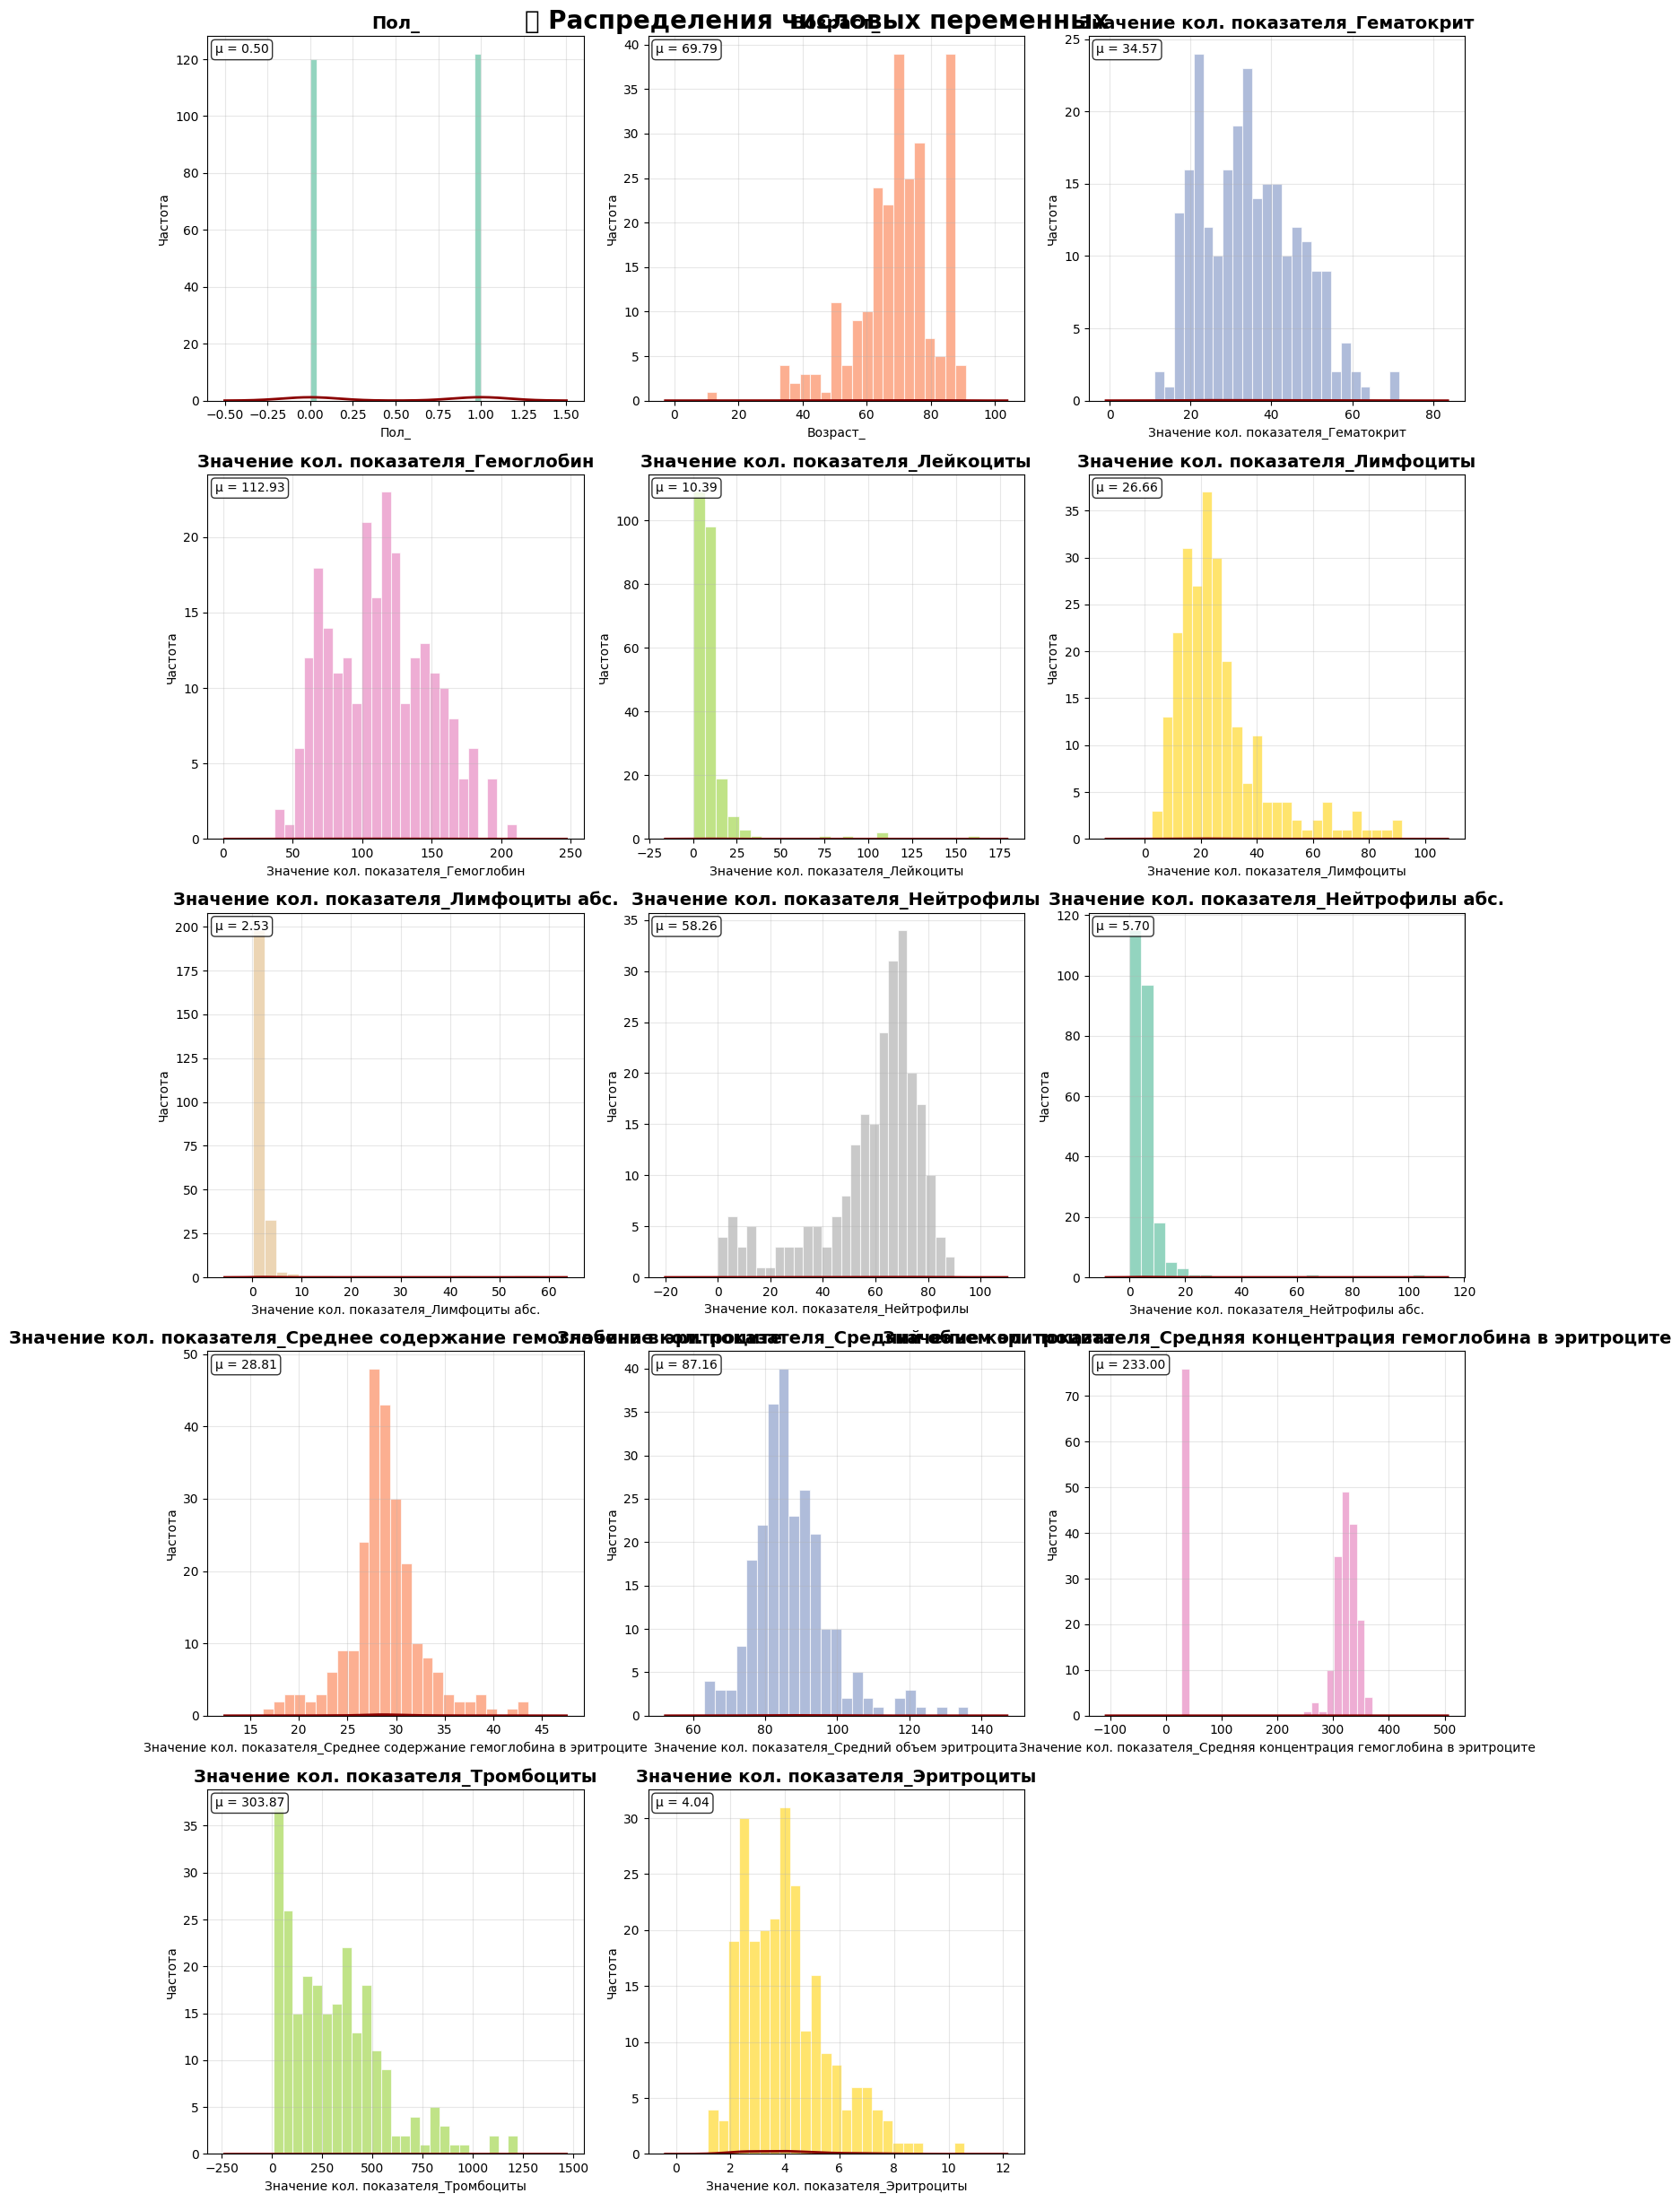

In [33]:
plot_hist_subplots(df_norm)

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание более подробных графиков с определением медианы и среднего
def plot_hist3(df):
    """
    Создает гистограммы для числовых столбцов.

    Параметры:
        df (pandas.DataFrame): DataFrame для анализа
    """
    # Устанавливаем стиль
    sns.set_style("whitegrid")

    numeric_cols = df.select_dtypes(include=['number']).columns

    # Выбор цвета
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

    for i, col in enumerate(numeric_cols):
        data = df[col].dropna()

        if len(data) == 0:
            continue

        plt.figure(figsize=(10, 6))

        # Основная гистограмма
        color = colors[i % len(colors)]
        plt.hist(data, bins=30, alpha=0.7, color=color, edgecolor='white')

        # Добавляем среднее значение и медиану
        mean_val = data.mean()
        median_val = data.median()

        plt.axvline(mean_val, color='red', linestyle='--', linewidth=2,
                   label=f'Среднее: {mean_val:.2f}')
        plt.axvline(median_val, color='orange', linestyle='--', linewidth=2,
                   label=f'Медиана: {median_val:.2f}')

        # Оформление
        plt.title(f'Распределение: {col}', fontsize=16, fontweight='bold')
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Количество', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Убираем верхнюю и правую границы
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        plt.tight_layout()
        plt.show()

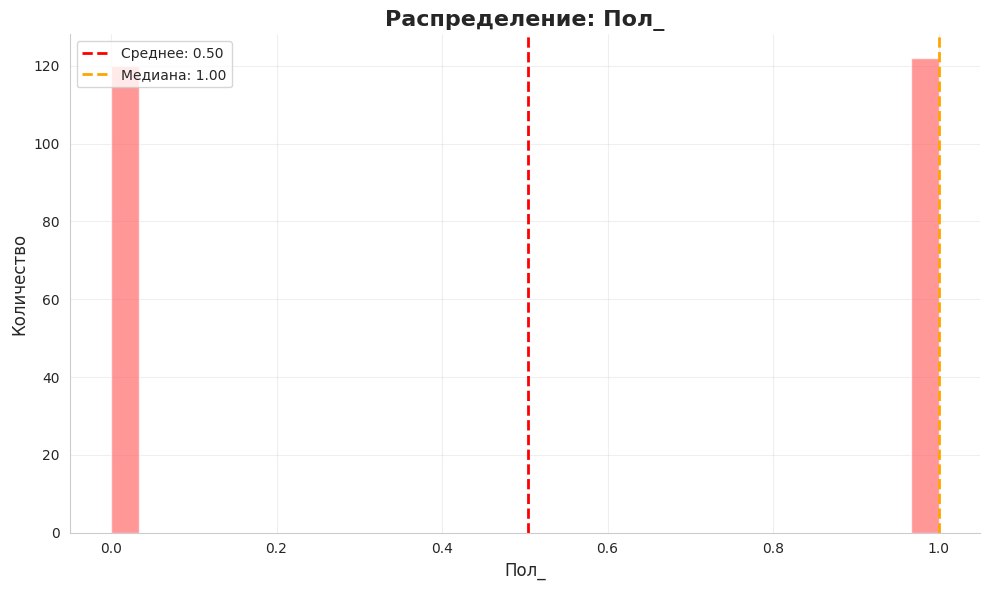

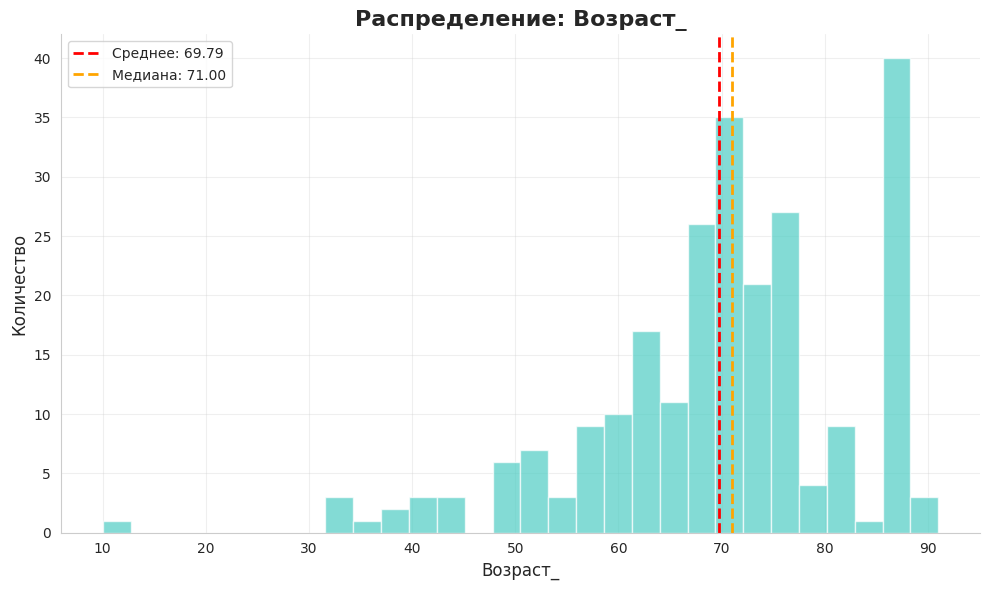

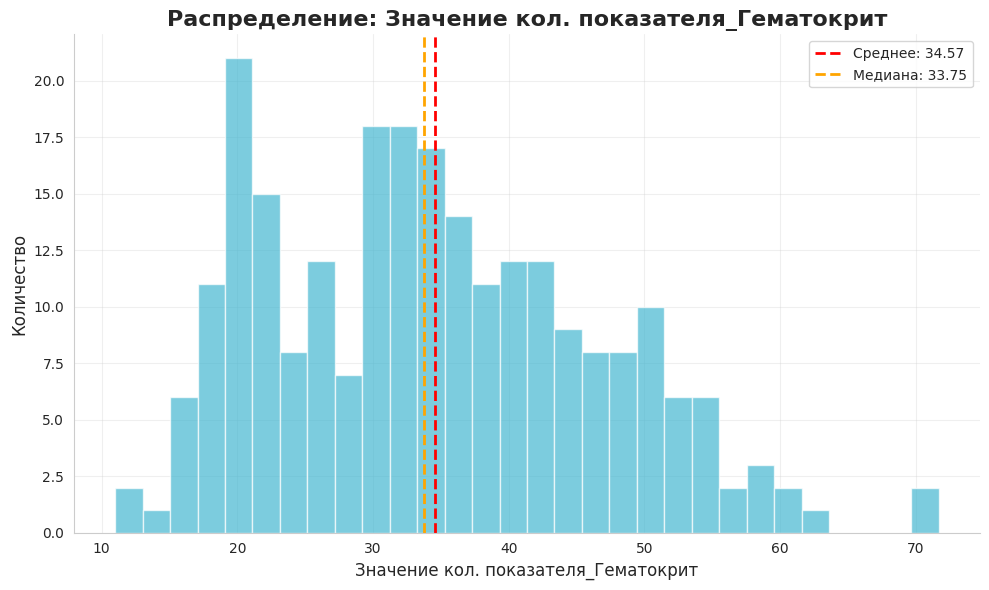

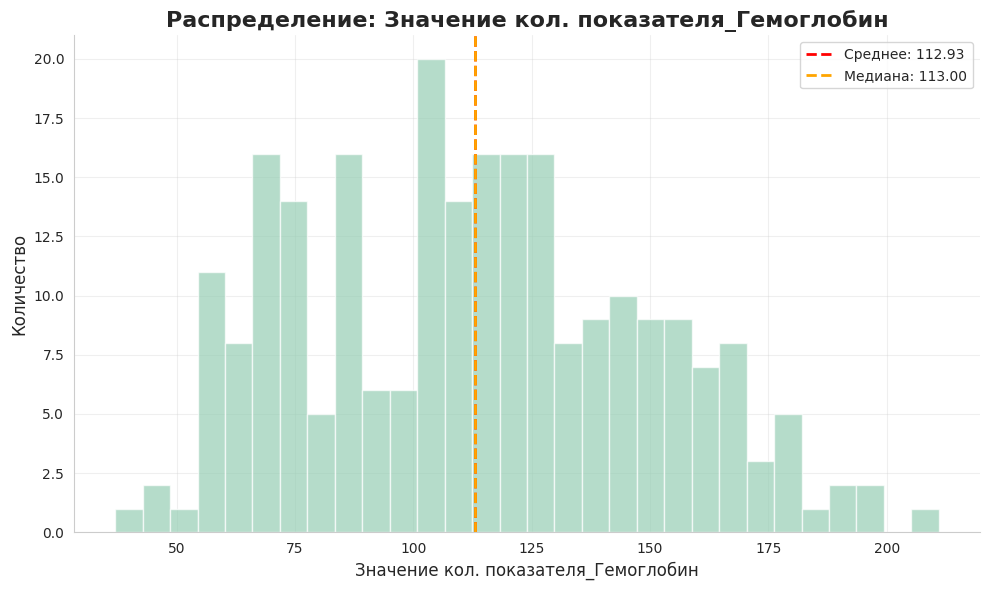

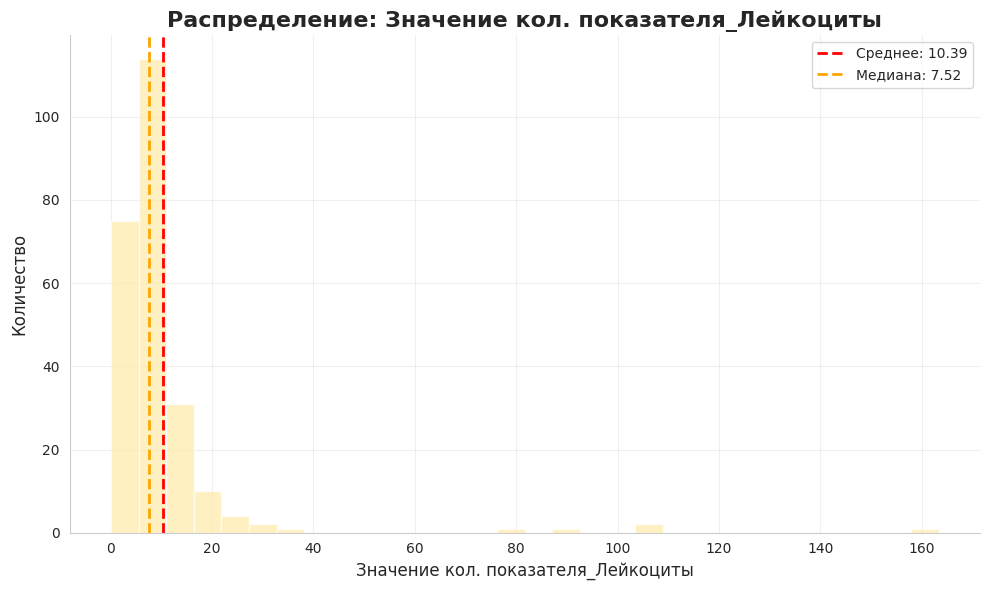

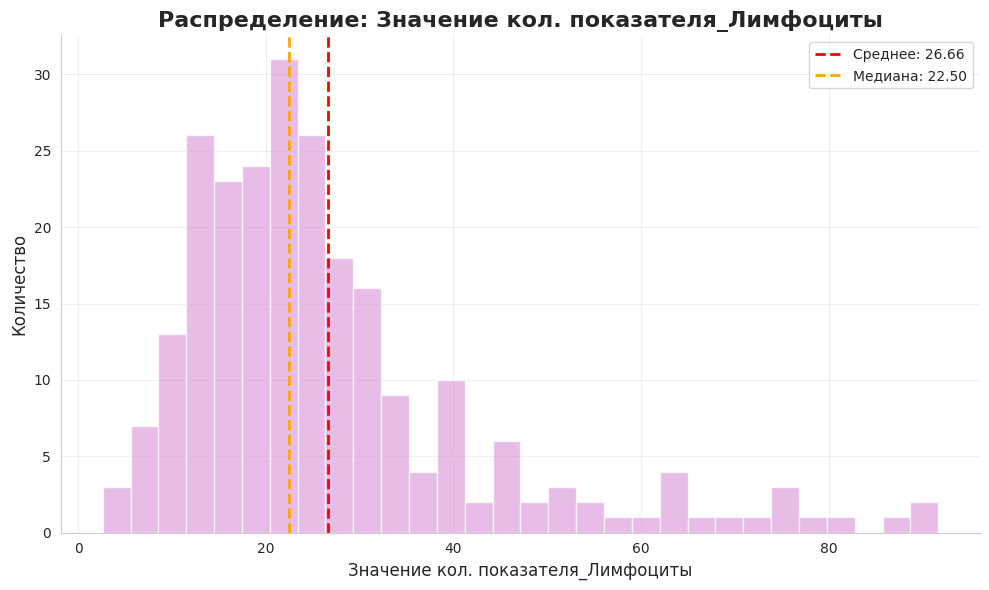

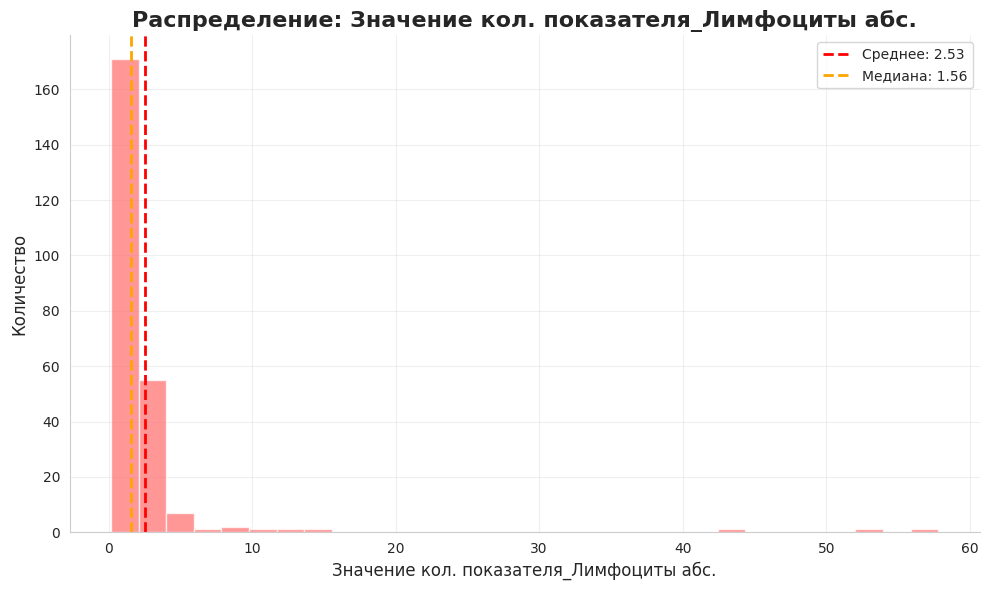

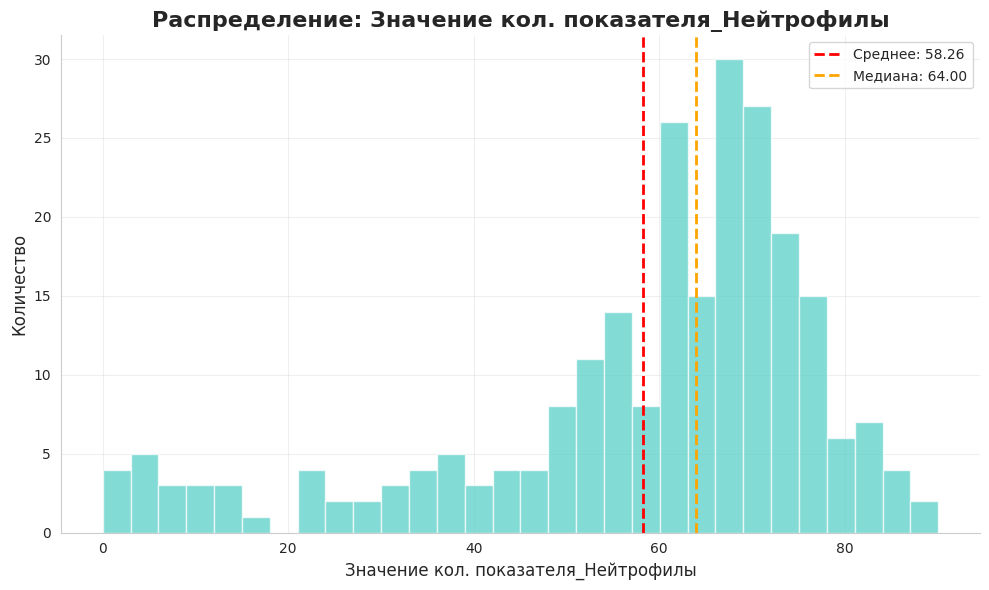

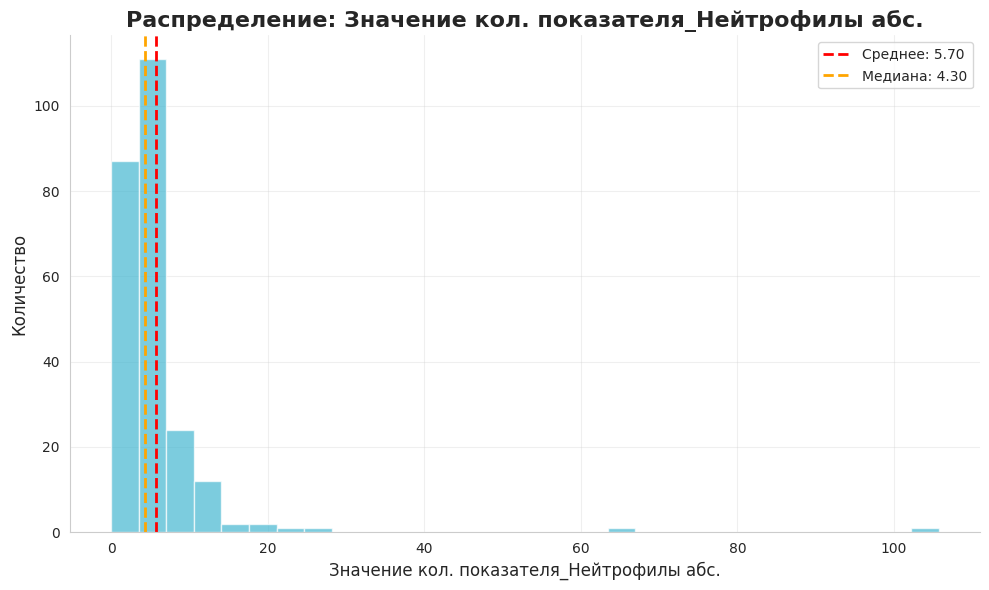

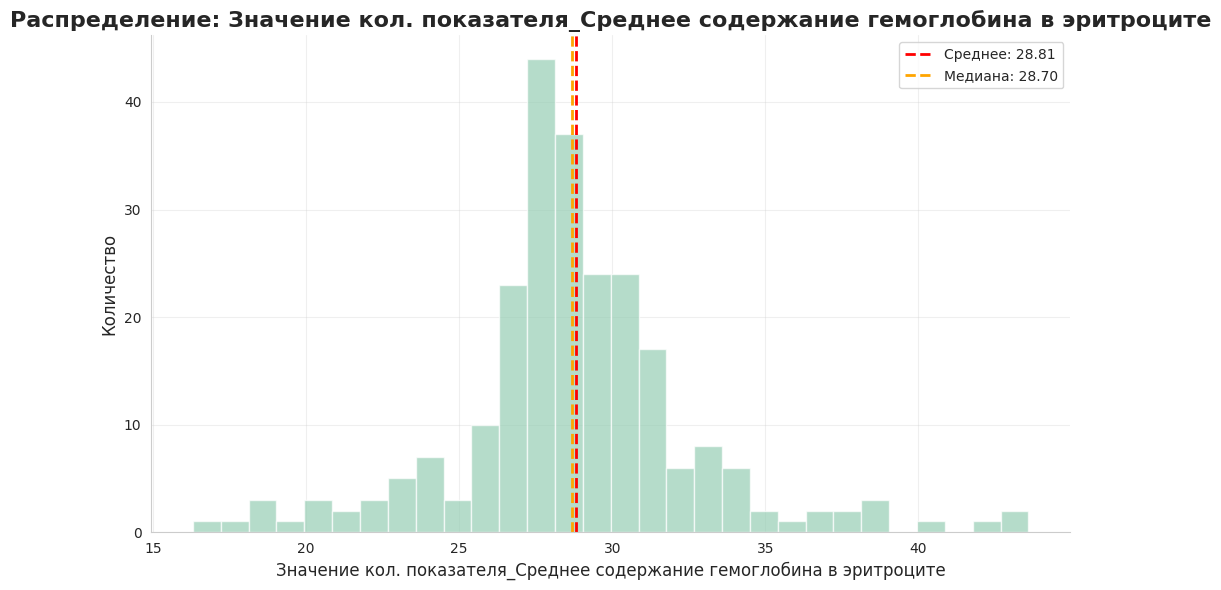

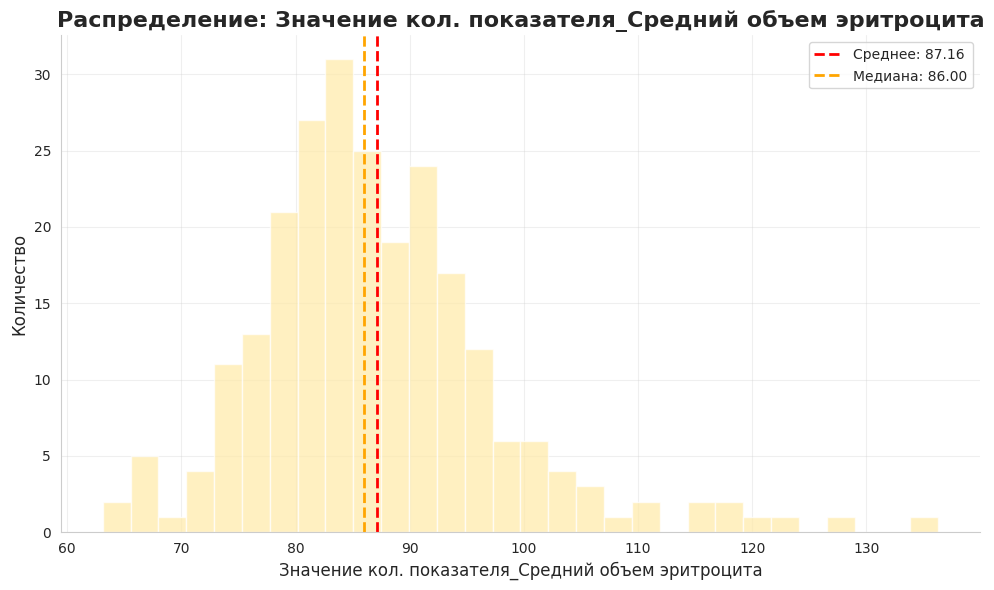

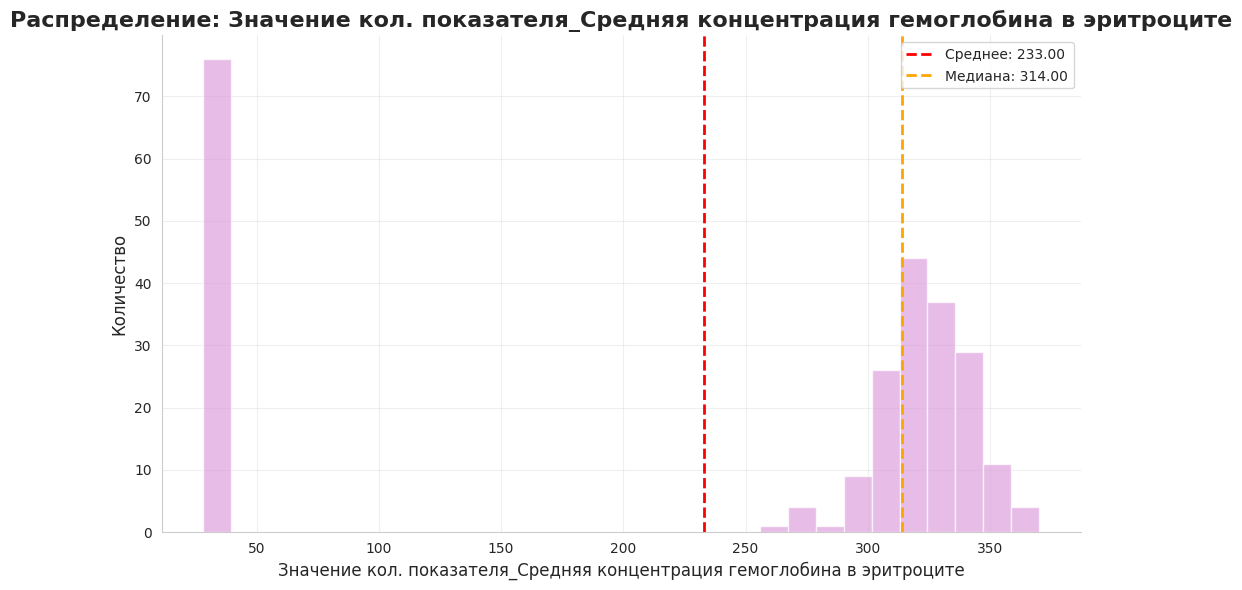

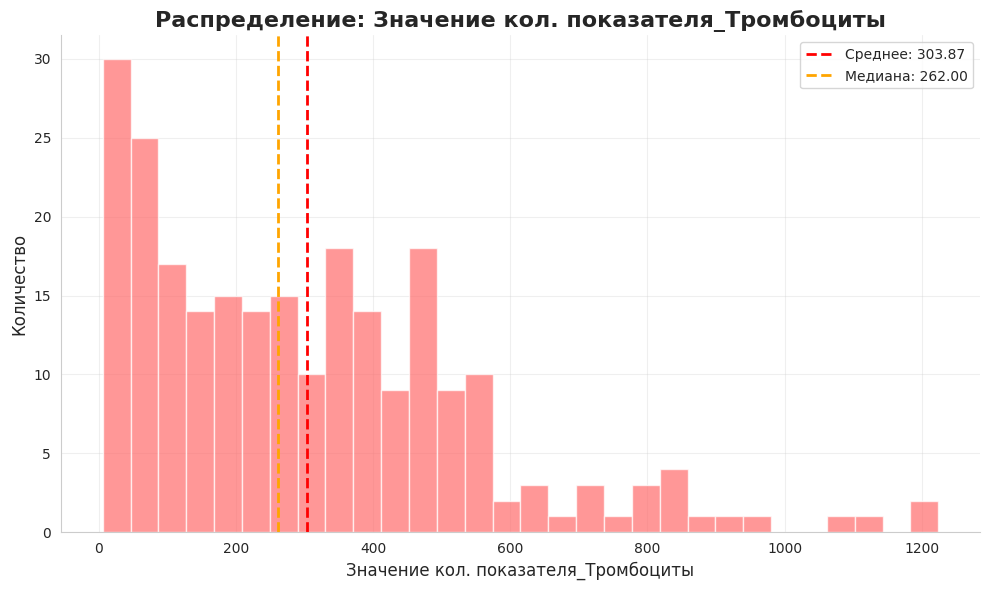

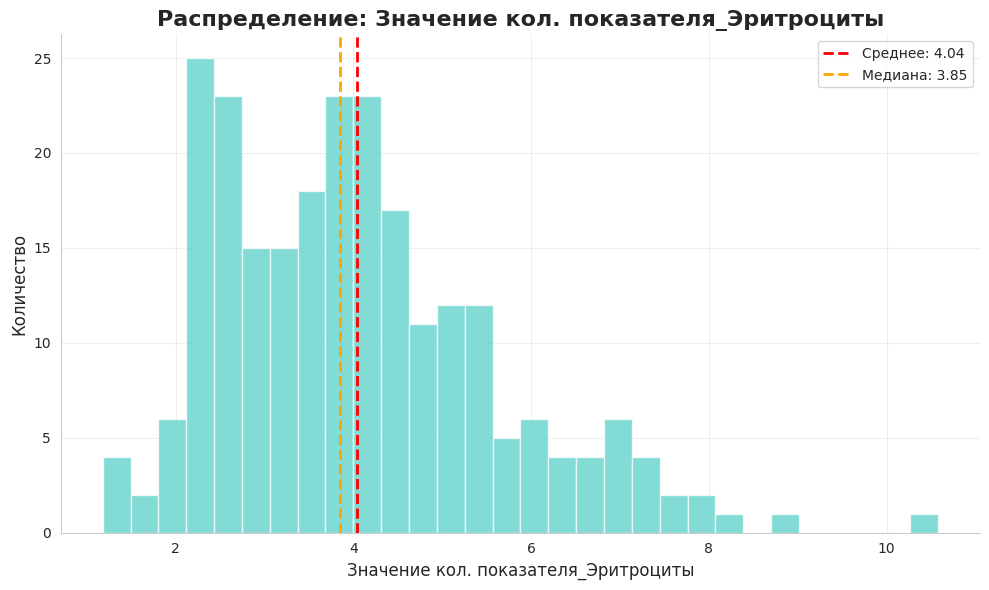

In [35]:
plot_hist3(df_norm)

Промежуточные выводы по гистограммам:
1. (график 1) Признак "Возраст" имеет правосторонюю ассиметрию (положительную скошенность) с пиком в области 70 лет и дополнительным пиком между 85 и 90 годами. Среднее значение возраста 69.79 лет, а медиана 71.00 год. Данные распределены бимодально. Большинство обследуемых возраста больше 60 лет, то есть наша выборка представлена гериартрической популяцией. Низкая представленность молодых возрастных групп (до 50 лет) указывает на очень специфический характер выборки.

Средний возраст больных ОМЛ (острый миелоидный лейкоз) - как раз около 65 лет (заболеваемость сильно растет с возрастом), средний возраст пациентов с ХМЛ (хронический миелоидный лейкоз) тоже около 65 лет, ХЛЛ также чаще наблюдается у пациентов старшей возрастной группы.


Это объясняет распределение возраста на нашей гистограмме.

2. (график 2) Данные гематокрита показывают нормальное распределение с небольшой левосторонней ассиметрией. Большинство значений сосредоточено в центральной части графика.
Среднее значение 34.57%, а медиана 33.75%. Исходя из нормы у мужчин: 39-49%, а женщин 35-45%, можно утверждать что большинство значений в выборке находятся ниже нормы, что свядетельствует о наличии анемических состояний у обследуемых, что часто наблюдается при лейкозах, так как нередко происходит поражение более 1 клеточной линии.

3. (график 3) Данные измерения гемоглобина показывают нормальное распределение также с незначительной левосторонней ассиметрией. Среднее значение - 112,93 г/л, а медиана - 113 г/л (практически симметричное распределение). Исходя из нормы значений гемоглобина у мужчин 130-160 г/л, и женщин 120-140 г/л, большинство значений в выборке находятся ниже нормы, что свидетельствует о анемии различной степени тяжести у пациентов. В контексте лейкемических больных такие показатели Hb могут объясняться угнетением эритропоэза и/или химиотерапией, подавляющей кроветворение.

4. (график 4) Лейкоциты: резковыраженная правосторонняя ассиметрия (положительная скошенность) с экстремально высоким пиком в области низких значений и длинным хвостом в стоорону высоких. Среднее значение лейкоцитов - 10.39 × 10⁹/л, медианное - 7.52 × 10⁹/л. Между средним и медианой значительная разница (около 2.9× 10⁹/л) из-за наличия высоко экстремальных значений и сильной ассиметрии. Учитывая нормальные значения лейкоцитов (4.0-9.0 × 10⁹/л), большинство пациентов имеют нормальные или слегка повышенные значения, но присутствует значительная группа с выраженным лейкоцитозом. Видимо выборка включает пациентов с различными формами лейкоза и на разных этапах лечения - от лейкопении (после химиотерапии) до гиперлейкоцитоза (активная фаза заболевания), что объясняет такой широкий разброс значений.

5. (график 5) Лимфоциты: правосторонняя асимметрия с выраженным пиком в области 15-25% и постепенным убыванием к высоким значениям, образуя характерный хвост. Среднее значение- 26.66%, а медианное - 22.50%. Разница между средним и медианой (4.16%) подтверждает правостороннюю асимметрию из-за влияния высоких значений.
Учитывая нормальные значения лимфоцитов (19-37% от общего числа лейкоцитов), большинство значений находятся в пределах нормы или на ее границах, что может указывать лтбо на преобладание пациентов с относительно стабильным состоянием, либо на возможное влияние терапии. Относительно благоприятное распределение с преобладанием нормальных значений может свидетельствовать о том, что выборка включает преимущественно пациентов с контролируемым течением заболевания или в стадии ремиссии.

6. (график 6) Лимфоциты абс значения: данные также демонстрируют крайне выраженную правостороннюю асимметрию с экстремально высоким пиком в области очень низких значений и протяженным "хвостом" в сторону высоких значений. Среднее значение - 2.53 × 10⁹/л, медианное - 1.56 × 10⁹/л. При норме абс числа лимфоцитов  (1.2-3.0 × 10⁹/л), выводы подтверждают пункт 5. Подавляющее большинство пациентов имеют значения в нижней части нормы или ниже нормы, что как раз характерно для лимфопении различной степени выраженности или для пациентов на активной химиотерапии.

7. (график 7 и график 8) Абсолютное и относительное содержание нейтрофилов:

Данные на графике 7 показывают левостороннюю асимметрию (отрицательную скошенность) с основным пиком в области высоких значений и более пологим спадом в сторону низких значений. Среднее значение относительного содержания нейтрофилов- 58.26%, а медианное - 64.00%.
Учитывая нормальные значения нейтрофилов (47-72% от общего числа лейкоцитов),большинство пациентов имеют нормальные или повышенные значения нейтрофилов, что может указывать на относительный нейтрофилез при снижении других популяций лейкоцитов. Такая же картина на графике абс содержания нейтрофилов (график 8): у большинства пациентов сохранены нормальные значения или они находятся на нижней границе нормы.
В отличие от лимфоцитов, нейтрофильное звено у большинства наших пациентов остается относительно сохранным, что может обеспечивать определенную защиту от инфекций.

8. Эритроцитарные показатели - (графики 9, 10, 11 и 13)
Начнем с графика 13 - распределение количества эритроцитов. Данные имеют бимодальное распределение с двумя выраженными пиками и общей правосторонней ассиметриецй. Среднее значение - 4.04 × 10¹²/л, медиана- 3.85 × 10¹²/л. Учитывая нормальные значения эритроцитов у мужчин (4.5-5.5 × 10¹²/л) и женщин (4.0-5.0 × 10¹²/л) большинство наших пациентов имеют сниженные значения эритроцитов, что свидетельствует о выраженной анемии. Также интересен провал в области 3.0-3.5 × 10¹²/л. Такое бимодальное распределение у лейкемических больных может отражать две различные группы пациентов - это больные с активным лейкозом (имеющие низкие значения) и пациенты в ремиссии или на поддерживающей терапии (более высокие значения). Но также это может свидетельствовать о различных формах лейкоза просто с разной степенью угнетения эритропоэза.
Показатали MCV, MHC и MCHC: большинство пациентов имеют нормальные значения MCV и MHC. А вот при определении средней концентрации гемоглобина в эритроците (MCHC) явно использование разных подходов при подсчете. Данные представлены в г/л и г/дл. Приведем их к общему виду.

9. (график 12) Распределение тромбоцитов:
Данные демонстрируют крайне выраженную правостороннюю асимметрию с очень высоким пиком в области низких значений и длинным "хвостом" в сторону высоких значений. Среднее значение - 303.87 × 10⁹/л, а медианное - 262.00 × 10⁹/л.
Разница между средним и медианой (41.87) указывает на влияние высоких выбросов. Подавляющее большинство имеет умеренную пациентов имеют тромбоцитопению (при норме 150-400 × 10⁹/л). Такое распределение типично для лейкемических больных.  

In [36]:
# Для столбца с средней концентрацией гемоглобина в эритроцитах переводим г/л в г/дл

def convert_hemo(df, col):
   """Конвертирует гемоглобин из г/дл в г/л (значения < 100 умножаются на 10)."""
   df_copy = df.copy()

   def convert(x):
       if pd.isna(x):
           return x
       if x < 100:
           return x * 10
       else:
           return x

   df_copy[col] = df_copy[col].apply(convert)
   return df_copy

In [37]:
# Применение функции к df_norm
df_norm = convert_hemo(df_norm, 'Значение кол. показателя_Средняя концентрация гемоглобина в эритроците')

display(df_norm.head())

ID истории болезни_ Осн. диаг. при выписке МКБ10 (текст)_  \
0  05deb1af-cf40-11e9-80ba-901b0e633689              Другой уточненный лейкоз   
1  06a83aaa-8e27-11ec-ab52-0050568844e6              Другой уточненный лейкоз   
2  0839c9c1-1109-11ef-8607-005056880ecb              Другой уточненный лейкоз   
3  08475dc2-40af-11ee-8604-005056880ecb              Другой уточненный лейкоз   
4  087489cd-0fb8-11ec-bb98-2cea7fe73f75              Другой уточненный лейкоз   

   Пол_  Возраст_ Ед. изм. кол. показателя_MPV Ед. изм. кол. показателя_P-LCR  \
0     1        87                          nan                            nan   
1     0        51                           fL                            nan   
2     1        86                          nan                            nan   
3     0        77                          nan                            nan   
4     1        73                           fL                            nan   

  Ед. изм. кол. показателя_RDW Ед. изм. кол. показателя_RDW-CV  \
0                            %                             nan   
1                            %                               %   
2                            %                               %   
3                            %                               %   
4                            %                               %   

  Ед. изм. кол. показателя_RDW-SD Ед. изм. кол. показателя_Базофилы  \
0                             nan                                 %   
1                              фл                                 %   
2                              фл                                 %   
3                              фл                                 %   
4                              фл                                 %   

  Ед. изм. кол. показателя_Базофилы абс. Ед. изм. кол. показателя_Бласты  \
0                                 10*9/л                             nan   
1                                 10*9/л                             nan   
2                                 10*9/л                               %   
3                                 10*9/л                             nan   
4                                 10*9/л                             nan   

  Ед. изм. кол. показателя_Гематокрит Ед. изм. кол. показателя_Гемоглобин  \
0                                   %                                 г/л   
1                                   %                                 г/л   
2                                   %                                 г/л   
3                                   %                                 г/л   
4                                   %                                 г/л   

  Ед. изм. кол. показателя_Лейкоциты Ед. изм. кол. показателя_Лимфоциты  \
0                             10*9/л                                  %   
1                             10*9/л                                  %   
2                             10*9/л                                  %   
3                             10*9/л                                  %   
4                             10*9/л                                  %   

  Ед. изм. кол. показателя_Лимфоциты абс. Ед. изм. кол. показателя_Миелоциты  \
0                                  10*9/л                                  %   
1                                  10*9/л                                nan   
2                                  10*9/л                                  %   
3                                  10*9/л                                nan   
4                                  10*9/л                                  %   

  Ед. изм. кол. показателя_Моноциты Ед. изм. кол. показателя_Моноциты абс.  \
0                                 %                                 10*9/л   
1                                 %                                 10*9/л   
2                                 %                                 10*9/л   
3                                 %                       

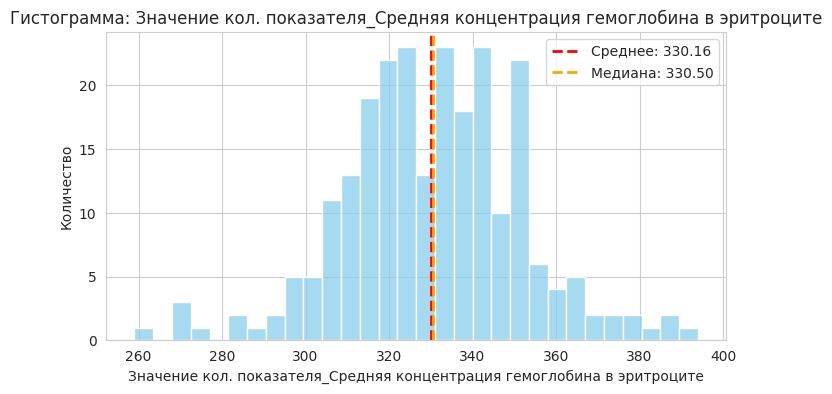

In [38]:
# Визуализируем столбец со средним значением гемоглобина в эритроцитах после преобразования
col = 'Значение кол. показателя_Средняя концентрация гемоглобина в эритроците'
plt.figure(figsize=(8, 4))
sns.histplot(df_norm[col].dropna(), bins=30, kde=False, color='skyblue')

#  Cреднее и медиана
mean_val = df_norm[col].mean()
median_val = df_norm[col].median()

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.2f}')
plt.axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.2f}')

plt.title(f'Гистограмма: {col}')
plt.xlabel(col)
plt.ylabel('Количество')
plt.legend()
plt.show()

Нормализация данных позволила получить корректное представление о MCHC у наших лейкемических больных, показав что у большинства пациентов концентрация гемоглобина в эритроцитах остается в пределах нормы, что характерно для нормоцитарной нормохромной анемии при гемобластозах.

-------------

## Построение корреляционной матрицы

Для определения силы и направления линейной связи между парами переменных посторим корреляционную матрицу.

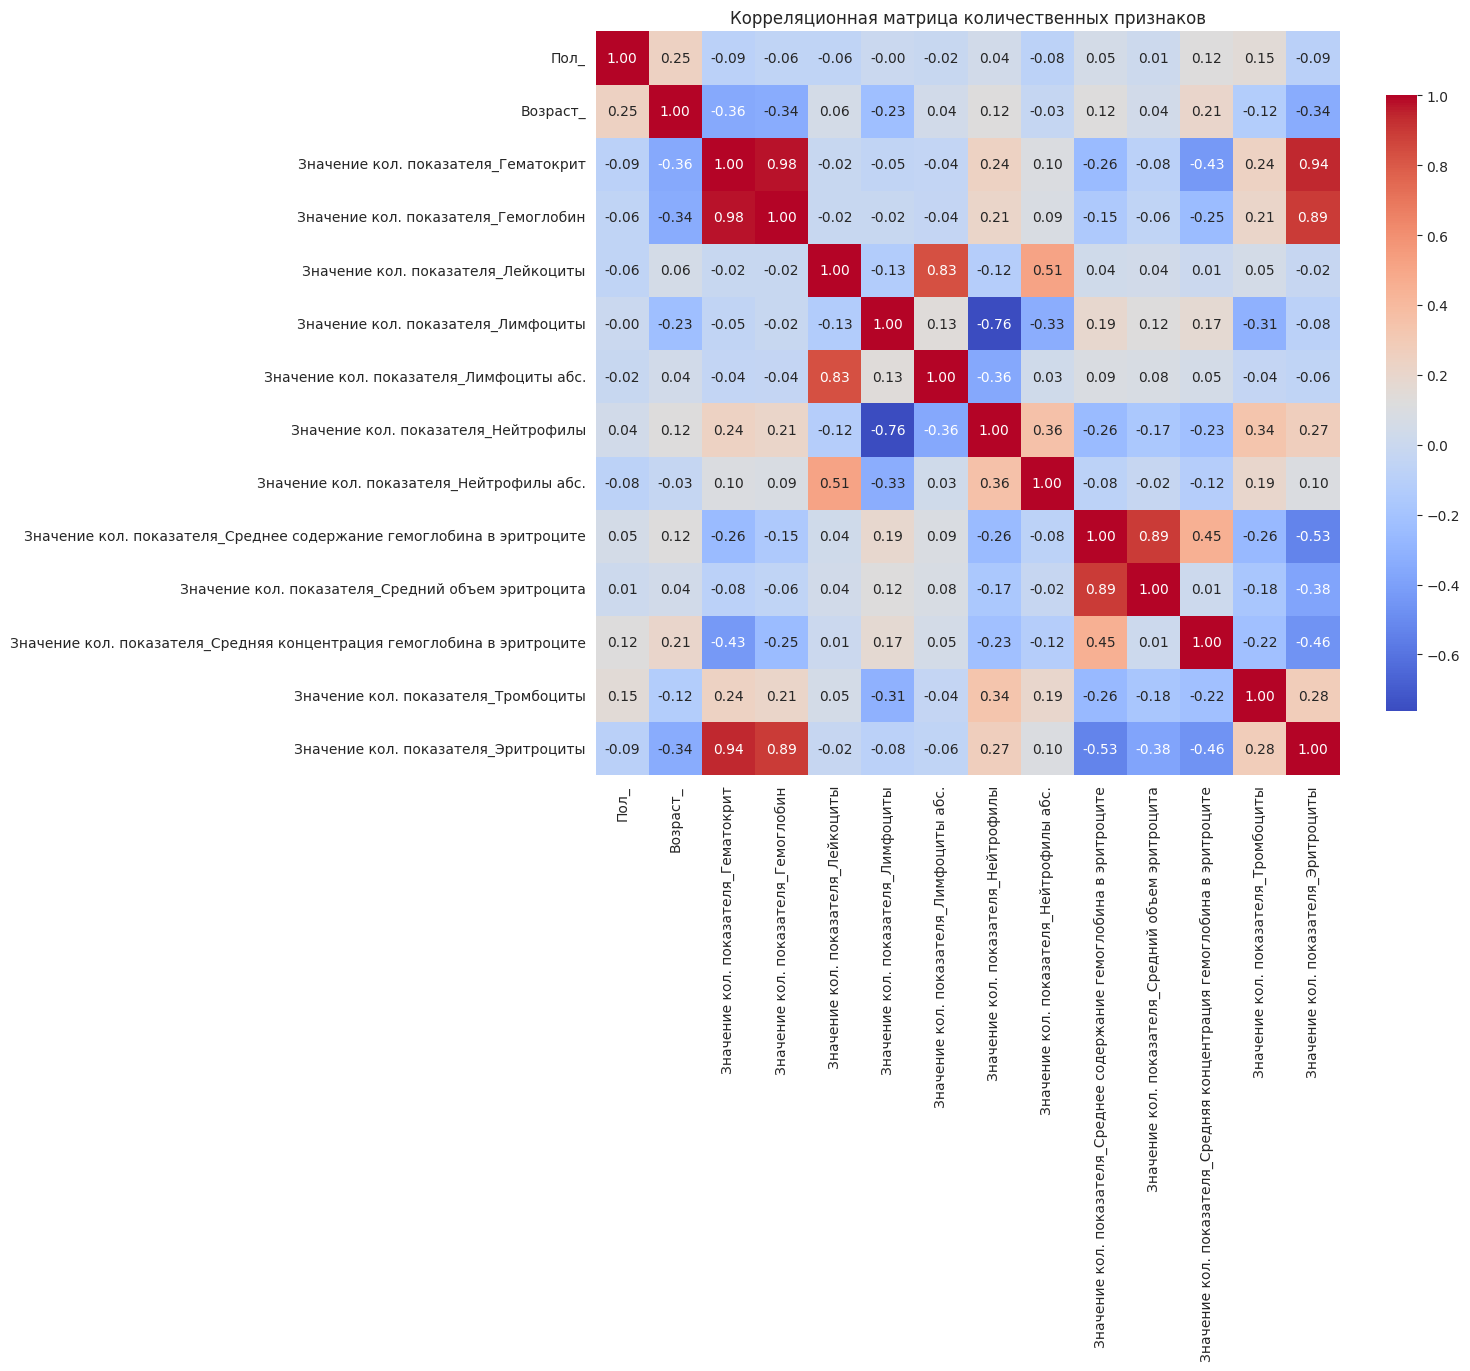

In [39]:
# Выбираем только количественные признаки
numeric_df = df_norm.select_dtypes(include=['number'])

# Считаем корреляционную матрицу
corr_matrix = numeric_df.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица количественных признаков')
plt.show()


На основе представленной корреляционной матрицы можно сделать следующие выводы:
1. Мы получили ожидаемые связи между гематокритом и гемоглобином (r = 0.98), гематокритом и эритроцитами (r = 0.94), гемоглобином и эритроцитами (r = 0.89) и среднем содержанием HB и MCV  (r = 0.89). Но это физиологичестки ожидаемые связи, абсолютная норма.

2. Сильная связь между общим количеством лейкоцитов и абсолютным числом лимфоцитов (r = 0.83). Говорит об относительном лимфоцитозе, что обусловлено ведующей нозологией нашего датасета.

3. Так же найдены отрицательные корреляции между лимфоцитами % и нейтрофилами % (r = -0.76), и лимфоцитами абс. и нейтрофилами % (r = -0.36). При увеличении одной популяции относительная доля другой снижается, что также обусловлено физиологически.

## Работа с пропусками

Выполним замену строковых значений 'nan' на реальные значения NaN.

In [40]:
df_norm.replace('nan', np.nan, inplace=True)

/tmp/ipython-input-3944635705.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_norm.replace('nan', np.nan, inplace=True)


In [41]:
# Суммируем количество пропусков
nan_df = df_norm.isna().sum()
nan_df = nan_df.sort_values(ascending=False)
display(nan_df)

Ед. изм. кол. показателя_Цветовой показатель                                242
Ед. изм. кол. показателя_Средний объём тромбоцитов                          241
Ед. изм. кол. показателя_Ширина распределения тромбоцитов по объему         241
Значение кол. показателя_Ширина распределения тромбоцитов по объему         241
Норма кол. показателя_Средний объём тромбоцитов                             241
                                                                           ... 
Флаг нормы кол. показателя_Нейтрофилы абс.                                    0
Флаг нормы кол. показателя_Тромбоциты                                         0
Флаг нормы кол. показателя_Средняя концентрация гемоглобина в эритроците      0
Флаг нормы кол. показателя_Средний объем эритроцита                           0
Флаг нормы кол. показателя_Эритроциты                                         0
Length: 196, dtype: int64

In [42]:
# Фильтруем столбцы, содержащие 'Ед. изм. кол. показателя'
subset = df_norm.loc[:, df_norm.columns.str.contains('Ед. изм. кол. показателя')]

# Считаем количество уникальных значений в столбцах
for column in subset.columns:
    print(f'\nУникальные значения в столбце "{column}"')
    value_counts = subset[column].value_counts(dropna=False)
    print(value_counts)


Уникальные значения в столбце "Ед. изм. кол. показателя_MPV"
Ед. изм. кол. показателя_MPV
NaN    208
fL      25
фл       9
Name: count, dtype: int64

Уникальные значения в столбце "Ед. изм. кол. показателя_P-LCR"
Ед. изм. кол. показателя_P-LCR
NaN    227
%       15
Name: count, dtype: int64

Уникальные значения в столбце "Ед. изм. кол. показателя_RDW"
Ед. изм. кол. показателя_RDW
%      240
NaN      2
Name: count, dtype: int64

Уникальные значения в столбце "Ед. изм. кол. показателя_RDW-CV"
Ед. изм. кол. показателя_RDW-CV
%      136
NaN    106
Name: count, dtype: int64

Уникальные значения в столбце "Ед. изм. кол. показателя_RDW-SD"
Ед. изм. кол. показателя_RDW-SD
фл     137
NaN    105
Name: count, dtype: int64

Уникальные значения в столбце "Ед. изм. кол. показателя_Базофилы"
Ед. изм. кол. показателя_Базофилы
%      241
NaN      1
Name: count, dtype: int64

Уникальные значения в столбце "Ед. изм. кол. показателя_Базофилы абс."
Ед. изм. кол. показателя_Базофилы абс.
10*9/л    231
NaN 

In [43]:
for i in subset:
  if subset[i].nunique() >= 2:
    display(i)

'Ед. изм. кол. показателя_MPV'

'Ед. изм. кол. показателя_Неклассифицируемые'

'Ед. изм. кол. показателя_Средний объем тромбоцита'

'Ед. изм. кол. показателя_Средний объем эритроцита'

'Ед. изм. кол. показателя_Средняя концентрация гемоглобина в эритроците'

'Ед. изм. кол. показателя_Ширина распределения тромбоцитов'

In [44]:
# Фильтруем столбцы, содержащие 'Норма кол. показателя'
subset = df_norm.loc[:, df_norm.columns.str.contains('Норма кол. показателя')]

# Считаем количество уникальных значений в столбцах
for column in subset.columns:
    print(f'\nУникальные значения в столбце "{column}"')
    value_counts = subset[column].value_counts(dropna=False)
    print(value_counts)


Уникальные значения в столбце "Норма кол. показателя_MPV"
Норма кол. показателя_MPV
NaN         208
6,5:10       21
7.5:10.0     11
7,5:10        2
Name: count, dtype: int64

Уникальные значения в столбце "Норма кол. показателя_P-LCR"
Норма кол. показателя_P-LCR
NaN        227
10.7:45     11
10,7:45      4
Name: count, dtype: int64

Уникальные значения в столбце "Норма кол. показателя_RDW"
Норма кол. показателя_RDW
10,5:18      144
10:18         67
11:16         21
11:18          7
NaN            2
10,5:18,0      1
Name: count, dtype: int64

Уникальные значения в столбце "Норма кол. показателя_RDW-CV"
Норма кол. показателя_RDW-CV
NaN        106
10:18       74
10,5:18     62
Name: count, dtype: int64

Уникальные значения в столбце "Норма кол. показателя_RDW-SD"
Норма кол. показателя_RDW-SD
37:54        135
NaN          105
33.4:49.2      1
35.3:48.9      1
Name: count, dtype: int64

Уникальные значения в столбце "Норма кол. показателя_Базофилы"
Норма кол. показателя_Базофилы
0:2       

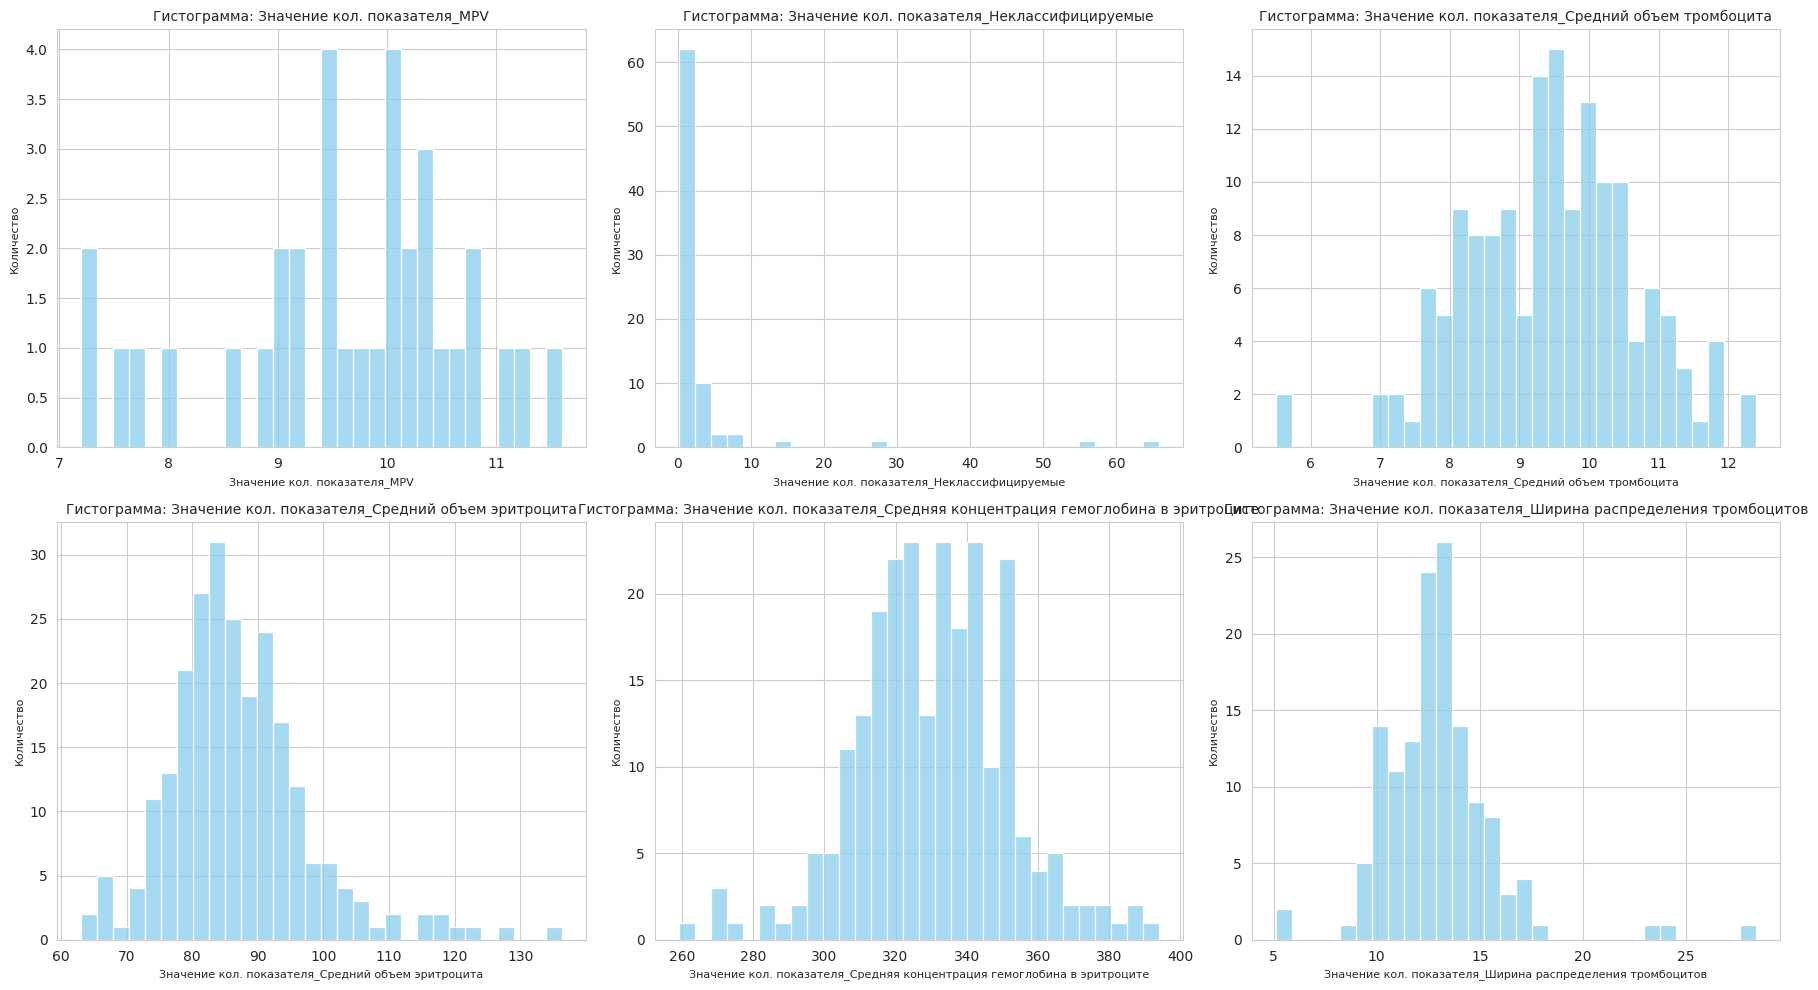

In [45]:
cols = ['Значение кол. показателя_MPV',
       'Значение кол. показателя_Неклассифицируемые',
       'Значение кол. показателя_Средний объем тромбоцита',
       'Значение кол. показателя_Средний объем эритроцита',
       'Значение кол. показателя_Средняя концентрация гемоглобина в эритроците',
       'Значение кол. показателя_Ширина распределения тромбоцитов']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
   sns.histplot(df_norm[col].dropna(), bins=30, kde=False, color='skyblue', ax=axes[i])
   axes[i].set_title(f'Гистограмма: {col}', fontsize=10)
   axes[i].set_xlabel(col, fontsize=8)
   axes[i].set_ylabel('Количество', fontsize=8)

plt.tight_layout()
plt.show()

--------

## Встречаемость диагнозов

Еще раз посмотрим на частоту встречаемости диагнозов.

In [46]:
display(round(df_norm['Осн. диаг. при выписке МКБ10 (текст)_'].value_counts(normalize=True), 3))

Осн. диаг. при выписке МКБ10 (текст)_
Другой уточненный лейкоз                       0.740
Острый миелоидный лейкоз                       0.120
Другой миелоидный лейкоз                       0.050
Хронический лимфоцитарный лейкоз               0.033
Хронический миелоидный лейкоз                  0.021
Плазмоклеточный лейкоз                         0.008
Волосатоклеточный лейкоз                       0.008
Острый лейкоз неуточненного клеточного типа    0.008
Острый лимфобластный лейкоз                    0.008
Острый миеломоноцитарный лейкоз                0.004
Name: proportion, dtype: float64

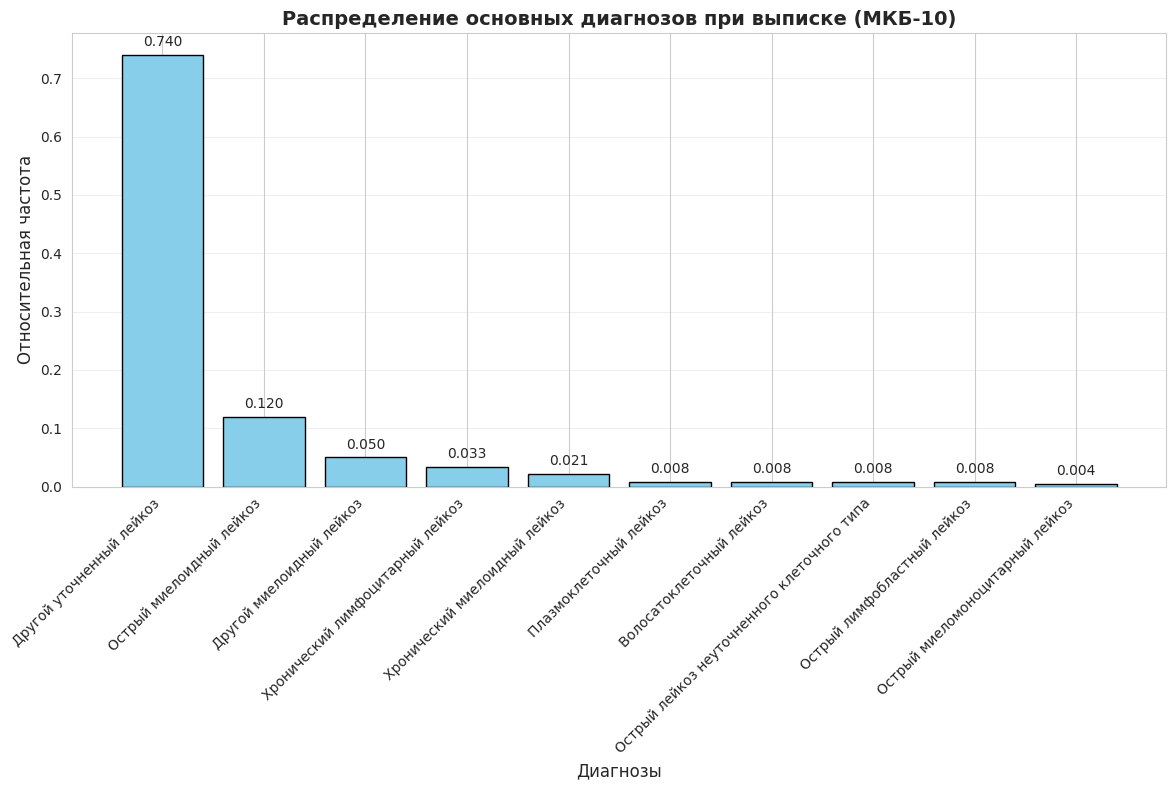

In [47]:
# Создаем переменную с данными
diag_counts = df_norm['Осн. диаг. при выписке МКБ10 (текст)_'].value_counts(normalize=True).round(3)

# Строим график
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(diag_counts)), diag_counts.values, color='skyblue', edgecolor='black')

# Настройки графика
plt.title('Распределение основных диагнозов при выписке (МКБ-10)', fontsize=14, fontweight='bold')
plt.xlabel('Диагнозы', fontsize=12)
plt.ylabel('Относительная частота', fontsize=12)

# Поворачиваем названия диагнозов для лучшей читаемости
plt.xticks(range(len(diag_counts)), diag_counts.index, rotation=45, ha='right')

# Добавляем значения на столбцы
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

"Другой уточненный лейкоз" составляет 74%  всех случаев, "Острый миелоидный лейкоз" - 12% случаев, "Другой миелоидный лейкоз" - 5%, "Хронический лимфоцитарный лейкоз" - 3.3% ,"Хронический миелоидный лейкоз" - 2.1%. Такое распределение типично для специализированных гематологических отделений, где концентрируются сложные и редкие случаи.

-----------------------

## Работа с референсами

Поработаем с референсами:

In [48]:
def convert_norm_to_min_max(dataset: pd.DataFrame, column: str):

  """
    Рассчитывает среднее значение нижних и верхних границ нормы по заданной колонке,
    где каждая запись представлена интервалом в формате "минимум:максимум".

    Параметры:
    - dataset: Наш рабочий датасет.
    - column: Имя колонки с референсами.

    Возвращает:
    Кортеж из двух значений: среднее нижнее и среднее верхнее значение нормы показателя.
  """

  #Инициализация счётчиков для средних значений нижней и верхней границ нормы
  min = 0
  max = 0

  #Инициализируем цикл прохождения по всем записям целевой колонки датасета
  for i in dataset[column]:
    #Оставляем только записи формата "минимум:максимум"
    if isinstance(i, str) and not pd.isna(i) and ':' in i:
      #Производим сплит по двоеточию, заменяем запятую на точку по необходимости
      #Записываем в счётчик нижней границы значение до двоеточия
      min += float(i.split(':')[0].replace(',','.'))
      #Записываем в счётчик верхней границы значение после двоеточия
      max += float(i.split(':')[1].replace(',','.'))
  #Считаем средние значения для нижней и верхней границ нормы, округляем до двух знаков после запятой
  min_final = round(min / dataset[column].count(), 2)
  max_final = round(max / dataset[column].count(), 2)

  return float(min_final), float(max_final)

In [49]:
#Создаём датасет, в котором будут содержаться отдельно средние значения нижних и верхних границ нормы для каждого количественного показателя
reference_min_max = pd.DataFrame()
#В цикле проходим по всем колонкам исходного датасета, содержащим нижние и верхние значения количественных показателей
for i in df_norm.loc[:, df_norm.columns.str.contains('Норма кол. показателя')]:
  #И создаём на их основе отдельно колонку с минимальным усреднённым значением, а также с максимальным усреднённым значением показателя
  reference_min_max[i + '_мин'] = [convert_norm_to_min_max(df_norm, i)[0]] * len(df_norm)
  reference_min_max[i + '_макс'] = [convert_norm_to_min_max(df_norm, i)[1]] * len(df_norm)


In [50]:
display(reference_min_max)

Норма кол. показателя_MPV_мин  Норма кол. показателя_MPV_макс  \
0                             6.88                            10.0   
1                             6.88                            10.0   
2                             6.88                            10.0   
3                             6.88                            10.0   
4                             6.88                            10.0   
..                             ...                             ...   
237                           6.88                            10.0   
238                           6.88                            10.0   
239                           6.88                            10.0   
240                           6.88                            10.0   
241                           6.88                            10.0   

     Норма кол. показателя_P-LCR_мин  Норма кол. показателя_P-LCR_макс  \
0                               10.7                              45.0   
1                               10.7                              45.0   
2                               10.7                              45.0   
3                               10.7                              45.0   
4                               10.7                              45.0   
..                               ...                               ...   
237                             10.7                              45.0   
238                             10.7                              45.0   
239                             10.7                              45.0   
240                             10.7                              45.0   
241                             10.7                              45.0   

     Норма кол. показателя_RDW_мин  Норма кол. показателя_RDW_макс  \
0                            10.42                           17.82   
1                            10.42                           17.82   
2                            10.42                           17.82   
3                            10.42                           17.82   
4                            10.42                           17.82   
..                             ...                             ...   
237                          10.42                           17.82   
238                          10.42                           17.82   
239                          10.42                           17.82   
240                          10.42                           17.82   
241                          10.42                           17.82   

     Норма кол. показателя_RDW-CV_мин  Норма кол. показателя_RDW-CV_макс  \
0                               10.23                               18.0   
1                               10.23                               18.0   
2                               10.23                               18.0   
3                               10.23                               18.0   
4                               10.23                               18.0   
..                                ...                                ...   
237                             10.23                               18.0   
238                             10.23                               18.0   
239                             10.23                               18.0   
240                             10.23                               18.0   
241                             10.23                               18.0   

     Норма кол. показателя_RDW-SD_мин  Норма кол. показателя_RDW-SD_макс  \
0                               36.96                              53.93   
1                               36.96                              53.93   
2                               36.96                              53.93   
3                               36.96                              53.93   
4                               36.96                              53.93   
..                                ...                            

## Группировка и категоризация данных основного датасета

In [51]:
display(df_norm)

ID истории болезни_  \
0    05deb1af-cf40-11e9-80ba-901b0e633689   
1    06a83aaa-8e27-11ec-ab52-0050568844e6   
2    0839c9c1-1109-11ef-8607-005056880ecb   
3    08475dc2-40af-11ee-8604-005056880ecb   
4    087489cd-0fb8-11ec-bb98-2cea7fe73f75   
..                                    ...   
237  fc6b2aea-d5ad-11ec-ab54-0050568844e6   
238  fc865ace-f83b-11ec-ab56-0050568844e6   
239  ff883bc4-80a2-11eb-bb94-2cea7fe73f75   
240  ffa72572-f065-11ec-ab56-0050568844e6   
241  ffdf0ad3-bb5b-11ee-ab6f-0050568844e6   

    Осн. диаг. при выписке МКБ10 (текст)_  Пол_  Возраст_  \
0                Другой уточненный лейкоз     1        87   
1                Другой уточненный лейкоз     0        51   
2                Другой уточненный лейкоз     1        86   
3                Другой уточненный лейкоз     0        77   
4                Другой уточненный лейкоз     1        73   
..                                    ...   ...       ...   
237              Другой уточненный лейкоз     1        71   
238              Другой уточненный лейкоз     1        60   
239              Другой уточненный лейкоз     1        86   
240              Другой уточненный лейкоз     0        70   
241              Другой уточненный лейкоз     0        71   

    Ед. изм. кол. показателя_MPV Ед. изм. кол. показателя_P-LCR  \
0                            NaN                            NaN   
1                             fL                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                             fL                            NaN   
..                           ...                            ...   
237                          NaN                            NaN   
238                          NaN                            NaN   
239                           fL                              %   
240                          NaN                            NaN   
241                          NaN                            NaN   

    Ед. изм. кол. показателя_RDW Ед. изм. кол. показателя_RDW-CV  \
0                              %                             NaN   
1                              %                               %   
2                              %                               %   
3                              %                               %   
4                              %                               %   
..                           ...                             ...   
237                            %                               %   
238                            %                               %   
239                            %                             NaN   
240                            %                               %   
241                            %                               %   

    Ед. изм. кол. показателя_RDW-SD Ед. изм. кол. показателя_Базофилы  \
0                               NaN                                 %   
1                                фл                                 %   
2                                фл                                 %   
3                                фл                                 %   
4                                фл                                 %   
..                              ...                               ...   
237                              фл                                 %   
238                              фл                                 %   
239                              фл                                 %   
240                              фл                                 %   
241                              фл                                 %   

    Ед. изм. кол. показателя_Базофилы абс. Ед. изм. кол. показателя_Бласты  \
0                                   10*9/л                             NaN   
1                                   10*9/л                             NaN   
2              

In [52]:
# Для начала удаляем все столбцы со значениями количественных показателей, где больше 30% пропусков. Для начала найдём такие столбцы
cols_for_delete = []
for i in df_norm.loc[:, df_norm.columns.str.contains('Значение кол. показателя')]:
  if (df_norm[i].count() / df_norm.shape[0]) < 0.7:
    cols_for_delete.append(i)
# Вывод столбцов для удаления и какое это будет количество от общей суммы
print(cols_for_delete)
print(f"Столбцов к удалению {len(cols_for_delete)} из {len(df_norm.loc[:, df_norm.columns.str.contains('Значение кол. показателя')].columns)}")

['Значение кол. показателя_MPV', 'Значение кол. показателя_P-LCR', 'Значение кол. показателя_RDW-CV', 'Значение кол. показателя_RDW-SD', 'Значение кол. показателя_Бласты', 'Значение кол. показателя_Миелоциты', 'Значение кол. показателя_Неклассифицируемые', 'Значение кол. показателя_Нормобласты', 'Значение кол. показателя_Плазматические клетки', 'Значение кол. показателя_Пролимфоциты', 'Значение кол. показателя_Промиелоциты', 'Значение кол. показателя_Ретикулоциты', 'Значение кол. показателя_СОЭ по Панченкову', 'Значение кол. показателя_Смешанная фракция', 'Значение кол. показателя_Смешанная фракция абс.', 'Значение кол. показателя_Средний объем тромбоцита', 'Значение кол. показателя_Средний объём тромбоцитов', 'Значение кол. показателя_Тромбокрит', 'Значение кол. показателя_Ширина распределения тромбоцитов', 'Значение кол. показателя_Ширина распределения тромбоцитов по объему', 'Значение кол. показателя_Ширина распределения эритроцитов (RDW)', 'Значение кол. показателя_Ширина распредел

In [53]:
# Удаляем столбцы
df_norm = df_norm.drop(columns=cols_for_delete)

# Выводим оставшиеся столбцы, содержащие 'Значение кол. показателя'
display(len(df_norm.loc[:, df_norm.columns.str.contains('Значение кол. показателя')].columns))

23

Осталось 23 столбца, теперь необходимо заполнить пропуски в них. Заполняем медианными значениями после группировки по полу, возрасту и диагнозу. Для этого для начала категоризирую возраст по следующему принципу:
- Дети: 0-14
- Молодые 15-39
- Взрослые 40-59
- Пожилые 60+

Для этого необходимо создать отдельный признак категории возраста

In [54]:
# Произвожу категоризацию с помощью lambda-функции
df_norm['Возраст_кат'] = df_norm['Возраст_'].apply(lambda x:
    'Дети' if x <= 14 else
    'Молодые' if x <= 39 else
    'Взрослые' if x <= 59 else
    'Пожилые'
)

/tmp/ipython-input-689091330.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_norm['Возраст_кат'] = df_norm['Возраст_'].apply(lambda x:


In [55]:
# Вывожу результат
display(df_norm['Возраст_кат'].value_counts())

Возраст_кат
Пожилые     203
Взрослые     32
Молодые       6
Дети          1
Name: count, dtype: int64

В основном в нашем датасете представлены пожилые и взрослые пациенты. Сейчас буду производить группировку по всем категориям, но в дальнейшем предлагаю удалить или объединить молодых и детей, так как для этой популяции характерны иные формы лейкозов.

In [56]:
# Заполнение пустых значений количественных признаков с помощью вышеописанной группировки

# Перебираем все столбцы, содержащие 'Значение кол. показателя'
for col in df_norm.loc[:, df_norm.columns.str.contains('Значение кол. показателя')].columns:

    # Группируем по полу, возрастной категории и диагнозу
    median_group = df_norm.groupby(['Пол_', 'Возраст_кат', 'Осн. диаг. при выписке МКБ10 (текст)_'])[col].transform('median')

    # Заполняем только те ячейки, где значение равно 0
    df_norm[col] = df_norm[col].mask(df_norm[col].isna(), median_group)


In [57]:
# Выводим результат заполнения пропущенных значений
display(df_norm.loc[:, df_norm.columns.str.contains('Значение кол. показателя')].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 23 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Значение кол. показателя_RDW                                            242 non-null    float64
 1   Значение кол. показателя_Базофилы                                       242 non-null    float64
 2   Значение кол. показателя_Базофилы абс.                                  241 non-null    float64
 3   Значение кол. показателя_Гематокрит                                     242 non-null    float64
 4   Значение кол. показателя_Гемоглобин                                     242 non-null    float64
 5   Значение кол. показателя_Лейкоциты                                      242 non-null    float64
 6   Значение кол. показателя_Лимфоциты                                      242 non-nu

None

Значения заполнены. Построим графики распределения по этим показателям.

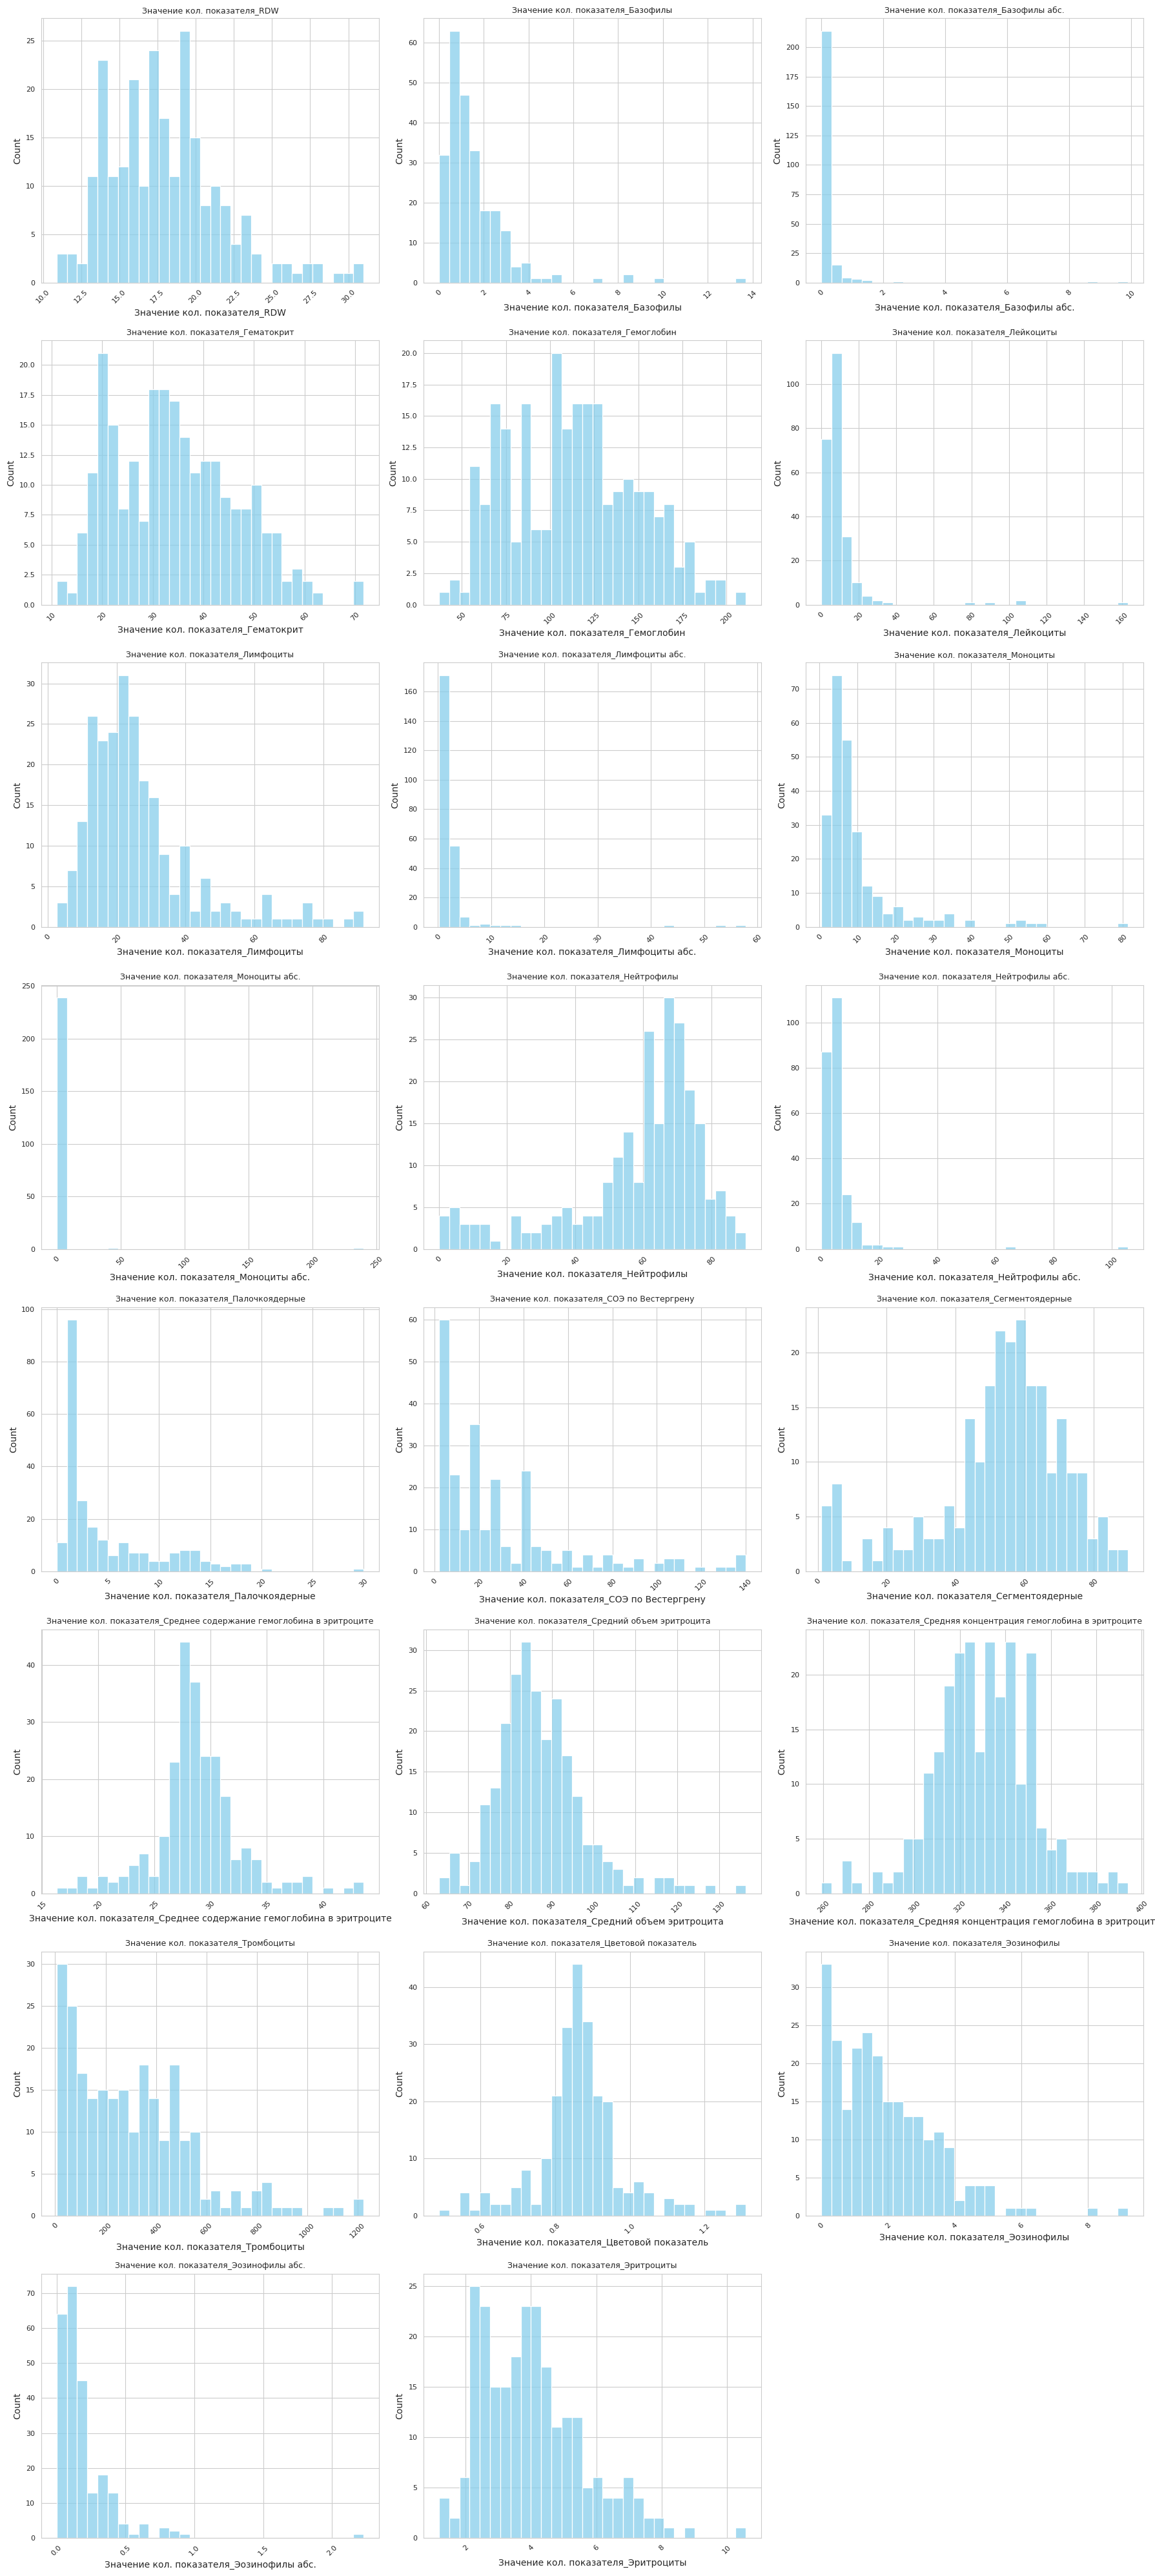

In [58]:
cols = df_norm.loc[:, df_norm.columns.str.contains('Значение кол. показателя')].columns.tolist()
n_cols = len(cols)

fig, axes = plt.subplots((n_cols + 2) // 3, 3, figsize=(18, 5 * ((n_cols + 2) // 3)))
axes = axes.flatten() if n_cols > 3 else [axes] if n_cols == 1 else axes

for i, col in enumerate(cols):
    sns.histplot(df_norm[col].dropna(), bins=30, kde=False, color='skyblue', ax=axes[i])
    axes[i].set_title(col, fontsize=9)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Скрываем неиспользуемые субплоты
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Видно, что по некоторым показателям есть выбросы, которые нужно обработать в дальнейшем. Сейчас же необходимо произвести категоризацию диагнозов по следующему принципу:

1. **острые формы (высокий риск)**

'Другой уточненный лейкоз': 'AML',

'Острый лейкоз неуточненного клеточного типа': 'AML',

'Другой лейкоз неуточненного клеточного типа': 'AML',

'Острый миелоидный лейкоз': 'AML',

'Другой миелоидный лейкоз': 'AML',

'Острый миеломоноцитарный лейкоз': 'AML',

'Острый лимфобластный лейкоз': 'ALL',

'Плазмоклеточный лейкоз': 'APL',

2. **хронические формы (средний риск)**

'Хронический миелоидный лейкоз': 'CML',

'Хронический лимфоцитарный лейкоз': 'CLL',

'Волосатоклеточный лейкоз': 'CHL',

In [59]:
# Выводим все имеющиеся в датасете диагнозы
display(df_norm['Осн. диаг. при выписке МКБ10 (текст)_'].value_counts())

Осн. диаг. при выписке МКБ10 (текст)_
Другой уточненный лейкоз                       179
Острый миелоидный лейкоз                        29
Другой миелоидный лейкоз                        12
Хронический лимфоцитарный лейкоз                 8
Хронический миелоидный лейкоз                    5
Плазмоклеточный лейкоз                           2
Волосатоклеточный лейкоз                         2
Острый лейкоз неуточненного клеточного типа      2
Острый лимфобластный лейкоз                      2
Острый миеломоноцитарный лейкоз                  1
Name: count, dtype: int64

Согласно нашему раззделению, под среднюю степень риска попадает 15 пациентов, под высокую - 227. Необходимо будет искуственно расширить группу со средней степенью риска.

In [60]:
# Создаём список, в котором будут содержаться названия диагнозов наименьшей группы (средний риск)
high_risk = ['Хронический миелоидный лейкоз', 'Хронический лимфоцитарный лейкоз','Волосатоклеточный лейкоз']

# Создаём новый признак "Риск" с помощью проверки, относится диагноз к средней группе риска или нет
df_norm['Риск'] = df_norm['Осн. диаг. при выписке МКБ10 (текст)_'].apply(lambda x: 'Средний' if x in high_risk else 'Высокий')

/tmp/ipython-input-3334372429.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_norm['Риск'] = df_norm['Осн. диаг. при выписке МКБ10 (текст)_'].apply(lambda x: 'Средний' if x in high_risk else 'Высокий')


In [61]:
# Выводим результат распределения пациентов по степени риска
display(df_norm['Риск'].value_counts())

Риск
Высокий    227
Средний     15
Name: count, dtype: int64

Как и ожидалось, в среднюю группу вошло 15 пациентов, все остаьные - в высокую. Теперь необходимо произвести выравниеание групп по количеству записей.

## Выравнивание выборки

В данном блоке описана наша первая попытка увеличения данных с помощью синтеза с применением шума.
https://habr.com/ru/articles/721170/

In [62]:
# Разделим датасет по группам риска
high_risk = df_norm[df_norm['Риск'] == 'Высокий']
medium_risk = df_norm[df_norm['Риск'] == 'Средний']

# # Сколько не хватает до 227
# n_needed = len(high_risk) - len(medium_risk)

# # Повторим строки меньшего класса с заменой (чтобы можно было дублировать)
# medium_oversampled = medium_risk.sample(n=n_needed, replace=True, random_state=42)

# # Объединим в новый датафрейм
# df_balanced = pd.concat([high_risk, medium_risk, medium_oversampled], ignore_index=True)

# # Проверим результат
# print(df_balanced['Риск'].value_counts())

In [63]:
# # Теперь необходимо добавить шум. Для начала выведу график распределения возраста в средней группе риска без внесения шумов
# plt.figure(figsize=(8, 4))
# sns.histplot(df_balanced[df_balanced['Риск'] == 'Средний']['Возраст_'].dropna(), bins=30, kde=False, color='skyblue')
# plt.title(f'Гистограмма распределения возраста в группе со средним риском до добавления шума')
# plt.xlabel(col)
# plt.ylabel('Количество')
# plt.show()

In [64]:
# # Задаю seed для одинаковой воспроизводимости данных
# np.random.seed(42)

In [65]:
# # Создаём маску по среднему риску
# mask = df_balanced['Риск'] == 'Средний'
# # Вносим шум во все значения возраста в отфильтрованном по риску датасете
# df_balanced.loc[mask, 'Возраст_'] = df_balanced.loc[mask, 'Возраст_'] + np.random.normal(0, 2, mask.sum())

In [66]:
# # Выведем распределение возраста в группе среднего риска после внесения шума
# plt.figure(figsize=(8, 4))
# sns.histplot(df_balanced[df_balanced['Риск'] == 'Средний']['Возраст_'].dropna(), bins=30, kde=False, color='skyblue')
# plt.title(f'Гистограмма распределения возраста в группе со средним риском до добавления шума')
# plt.xlabel('Возраст')
# plt.ylabel('Количество')
# plt.show()

Сработало! Теперь необходимо внести шум в количественные признаки. Вносим шум по принципу варьирования от 0.75 до 1.25.

Теперь переходим к количественным показателям. Для начала выведем графики распределения величин в средней группе риска до внесения шума.

In [67]:
# # Отфильтруем данные со средним риском
# df_medium_risk = df_balanced[df_balanced['Риск'] == 'Средний']

# # Проходимся по всем количественным признакам
# for col in df_medium_risk.loc[:, df_norm.columns.str.contains('Значение кол. показателя')].columns:
#     plt.figure(figsize=(8, 4))
#     # Строим гистограмму по значению конкретного показателя в группе среднего риска
#     sns.histplot(df_medium_risk[col].dropna(), bins=30, kde=False, color='skyblue')
#     plt.title(f'Гистограмма: {col}')
#     plt.xlabel(col)
#     plt.ylabel('Количество')
#     plt.tight_layout()
#     plt.show()

In [68]:
# # Проходимся по всем столбцам, содержащим 'Значение кол. показателя'
# for col in df_balanced.columns[df_balanced.columns.str.contains('Значение кол. показателя')]:

#     # Выбираем только те строки, которые соответствуют средней группе риска)
#     # и добавляем к их значениям случайный шум в диапазоне 75%–125%
#     df_balanced.loc[mask, col] = df_balanced.loc[mask, col] * np.random.uniform(0.75, 1.25, size=mask.sum())

In [69]:
# # Теперь посмотрим, как изменились показатели в средней группе риска после внесения шума
# # Проходимся по всем количественным признакам
# for col in df_medium_risk.loc[:, df_norm.columns.str.contains('Значение кол. показателя')].columns:
#     plt.figure(figsize=(8, 4))
#     # Строим гистограмму по значению конкретного показателя в группе среднего риска
#     sns.histplot(df_medium_risk[col].dropna(), bins=30, kde=False, color='skyblue')
#     plt.title(f'Гистограмма: {col}')
#     plt.xlabel(col)
#     plt.ylabel('Количество')
#     plt.tight_layout()
#     plt.show()

Здесь описан блок кода окончательного выбора в пользу балансировки без искажения лабораторных значений.

In [70]:
# Простая балансировка без искажения лабораторных значений
from sklearn.utils import resample

medium_oversampled = resample(
        medium_risk,
        replace=True,
        n_samples=len(high_risk),
        random_state=42
)

df_balanced = pd.concat([high_risk, medium_oversampled], ignore_index=True)
print(df_balanced['Риск'].value_counts())


Риск
Высокий    227
Средний    227
Name: count, dtype: int64


In [71]:
# Проверяем, какие колонки у нас сохранились
display(df_balanced.columns)

Index(['ID истории болезни_', 'Осн. диаг. при выписке МКБ10 (текст)_', 'Пол_',
       'Возраст_', 'Ед. изм. кол. показателя_MPV',
       'Ед. изм. кол. показателя_P-LCR', 'Ед. изм. кол. показателя_RDW',
       'Ед. изм. кол. показателя_RDW-CV', 'Ед. изм. кол. показателя_RDW-SD',
       'Ед. изм. кол. показателя_Базофилы',
       ...
       'Флаг нормы кол. показателя_Ширина распределения эритроцитов (RDW)',
       'Флаг нормы кол. показателя_Ширина распределения эритроцитов по объему, коэффициент вариации',
       'Флаг нормы кол. показателя_Ширина распределения эритроцитов по объему, стандартное отклонение',
       'Флаг нормы кол. показателя_Ширина распределения эритроцитов, стандартное отклонение (RDW-SD)',
       'Флаг нормы кол. показателя_Эозинофилы',
       'Флаг нормы кол. показателя_Эозинофилы абс.',
       'Флаг нормы кол. показателя_Эритроциты',
       'Флаг нормы кол. показателя_Юные', 'Возраст_кат', 'Риск'],
      dtype='object', length=173)

In [72]:
# Создаем колонки со здоровыми людьми
all_colls=df_balanced.columns
all_colls

Index(['ID истории болезни_', 'Осн. диаг. при выписке МКБ10 (текст)_', 'Пол_',
       'Возраст_', 'Ед. изм. кол. показателя_MPV',
       'Ед. изм. кол. показателя_P-LCR', 'Ед. изм. кол. показателя_RDW',
       'Ед. изм. кол. показателя_RDW-CV', 'Ед. изм. кол. показателя_RDW-SD',
       'Ед. изм. кол. показателя_Базофилы',
       ...
       'Флаг нормы кол. показателя_Ширина распределения эритроцитов (RDW)',
       'Флаг нормы кол. показателя_Ширина распределения эритроцитов по объему, коэффициент вариации',
       'Флаг нормы кол. показателя_Ширина распределения эритроцитов по объему, стандартное отклонение',
       'Флаг нормы кол. показателя_Ширина распределения эритроцитов, стандартное отклонение (RDW-SD)',
       'Флаг нормы кол. показателя_Эозинофилы',
       'Флаг нормы кол. показателя_Эозинофилы абс.',
       'Флаг нормы кол. показателя_Эритроциты',
       'Флаг нормы кол. показателя_Юные', 'Возраст_кат', 'Риск'],
      dtype='object', length=173)

In [73]:
#Извлечем референсные значения
ref_ranges = {} #Создадим словарь, где будут верхняя и нижняя границы
for col in df_balanced.columns[df_balanced.columns.str.contains('Норма кол. показателя')]: #проходимся по каждому столбцу 'Норма кол. показателя'
    param_name = col.replace('Норма кол. показателя_', '') #Извлекаем название лаб показателя
    min_val, max_val = convert_norm_to_min_max(df_balanced, col) #Вызываем функцию, которая разбивает на верхнюю и нижнюю границы нормы
    ref_ranges[param_name] = (min_val, max_val) #Добавляем в словарь пару: название параметра- мин макс норма

# Проверим
print(ref_ranges['Гемоглобин'])

(124.6, 171.88)


In [74]:
#Напишем функцию для генерации случайных значений внутри референсного диапазона:
def generate_normal_value(param_name):
    min_val, max_val = ref_ranges.get(param_name, (0, 1)) #Ищем в словаре значения по ключу
    return round(np.random.uniform(min_val, max_val), 2) #Генерируем случайное число в пределах от мин до макс и округляем

In [75]:
#Отфильтровываем столбцы только с названиями 'Значение кол. показателя_', имеющие числовой тип данных
numeric_cols = ['Значение кол. показателя_MPV', 'Значение кол. показателя_P-LCR',
       'Значение кол. показателя_RDW', 'Значение кол. показателя_RDW-CV',
       'Значение кол. показателя_RDW-SD', 'Значение кол. показателя_Базофилы',
       'Значение кол. показателя_Базофилы абс.',
       'Значение кол. показателя_Бласты',
       'Значение кол. показателя_Гематокрит',
       'Значение кол. показателя_Гемоглобин',
       'Значение кол. показателя_Лейкоциты',
       'Значение кол. показателя_Лимфоциты',
       'Значение кол. показателя_Лимфоциты абс.',
       'Значение кол. показателя_Миелоциты',
       'Значение кол. показателя_Моноциты',
       'Значение кол. показателя_Моноциты абс.',
       'Значение кол. показателя_Нейтрофилы',
       'Значение кол. показателя_Нейтрофилы абс.',
       'Значение кол. показателя_Неклассифицируемые',
       'Значение кол. показателя_Нормобласты',
       'Значение кол. показателя_Палочкоядерные',
       'Значение кол. показателя_Плазматические клетки',
       'Значение кол. показателя_Пролимфоциты',
       'Значение кол. показателя_Промиелоциты',
       'Значение кол. показателя_Ретикулоциты',
       'Значение кол. показателя_СОЭ по Вестергрену',
       'Значение кол. показателя_СОЭ по Панченкову',
       'Значение кол. показателя_Сегментоядерные',
       'Значение кол. показателя_Смешанная фракция',
       'Значение кол. показателя_Смешанная фракция абс.',
       'Значение кол. показателя_Среднее содержание гемоглобина в эритроците',
       'Значение кол. показателя_Средний объем тромбоцита',
       'Значение кол. показателя_Средний объем эритроцита',
       'Значение кол. показателя_Средний объём тромбоцитов',
       'Значение кол. показателя_Средняя концентрация гемоглобина в эритроците',
       'Значение кол. показателя_Тромбокрит',
       'Значение кол. показателя_Тромбоциты',
       'Значение кол. показателя_Цветовой показатель',
       'Значение кол. показателя_Ширина распределения тромбоцитов',
       'Значение кол. показателя_Ширина распределения тромбоцитов по объему',
       'Значение кол. показателя_Ширина распределения эритроцитов (RDW)',
       'Значение кол. показателя_Ширина распределения эритроцитов по объему, коэффициент вариации',
       'Значение кол. показателя_Ширина распределения эритроцитов по объему, стандартное отклонение',
       'Значение кол. показателя_Ширина распределения эритроцитов, стандартное отклонение (RDW-SD)',
       'Значение кол. показателя_Эозинофилы',
       'Значение кол. показателя_Эозинофилы абс.',
       'Значение кол. показателя_Эритроциты', 'Значение кол. показателя_Юные']

In [76]:
#Генерируем DataFrame со здоровыми пациентами
np.random.seed(42) #фиксируем зерно для генератора случ чисел

def generate_healthy_patients(n_patients=100): #Генерация данных для здоровых пациентов в количестве 100
    data = [] #Создаем список, куда будем добавлять словари с даннымик аждого пациента
    for _ in range(n_patients): #повторяем этот блок столько раз, сколько у нас пациентов, т.е 100
        patient = {
            'Возраст_': np.random.randint(10, 100),
            'Пол_': np.random.randint(0, 2),
            'Осн. диаг. при выписке МКБ10 (текст)_': 'Здоров',  # Все пациенты здоровы
        }
        # Добавляем анализы
        for param in numeric_cols:
            param_name = param.split('_')[-1] #Из названия извлекаем последнюю часть
            patient[param] = generate_normal_value(param_name) #Вызываем функцию, которая генерирует случайную норму
        data.append(patient) #Добавляем этого пациента в список
    return pd.DataFrame(data)

# Генерация 100 пациентов
df_healthy = generate_healthy_patients(n_patients=200)

In [77]:
# Произвожу категоризацию с помощью lambda-функции
df_healthy['Возраст_кат'] = df_healthy['Возраст_'].apply(lambda x:
    'Дети' if x <= 14 else
    'Молодые' if x <= 39 else
    'Взрослые' if x <= 59 else
    'Пожилые'
)

In [78]:
df_healthy['Риск'] = 'Низкий'

In [79]:
df_healthy

Возраст_  Пол_ Осн. диаг. при выписке МКБ10 (текст)_  \
0          61     0                                Здоров   
1          72     1                                Здоров   
2          86     0                                Здоров   
3          63     0                                Здоров   
4          12     1                                Здоров   
..        ...   ...                                   ...   
195        96     1                                Здоров   
196        32     1                                Здоров   
197        56     1                                Здоров   
198        85     1                                Здоров   
199        93     0                                Здоров   

     Значение кол. показателя_MPV  Значение кол. показателя_P-LCR  \
0                            7.45                           37.44   
1                            9.30                           42.92   
2                            6.98                           32.53   
3                            7.75                           41.85   
4                            9.65                           37.45   
..                            ...                             ...   
195                          9.73                           12.91   
196                          7.39                           24.98   
197                          9.27                           17.80   
198                          8.50                           39.23   
199                          8.70                           12.01   

     Значение кол. показателя_RDW  Значение кол. показателя_RDW-CV  \
0                           14.85                            13.70   
1                           17.11                            14.88   
2                           12.70                            14.19   
3                           12.13                            11.36   
4                           15.19                            10.89   
..                            ...                              ...   
195                         10.73                            11.69   
196                         16.64                            17.90   
197                         17.15                            14.30   
198                         15.32                            12.95   
199                         14.02                            15.77   

     Значение кол. показателя_RDW-SD  Значение кол. показателя_Базофилы  \
0                              38.67                               0.92   
1                              52.61                               0.18   
2                              52.37                               0.50   
3                              45.28                               1.97   
4                              39.71                               1.80   
..                               ...                                ...   
195                            52.40                               1.04   
196                            42.37                               1.06   
197                            38.91                               0.80   
198                            48.35                               1.28   
199                            51.72                               1.87   

     Значение кол. показателя_Базофилы абс.  Значение кол. показателя_Бласты  \
0                                      0.03                              0.0   
1                                      0.02                              0.0   
2                                      0.04                              0.0   
3                                      0.02                              0.0   
4                                      0.06                              0.0   
..                                      ...                              ...   
195                                    0.08                              0.0   
196                                    0.05                  

Объединим таблицы с сгенерированными здоровыми и больными с параметром join='inner', так как количеcтво колонок отличается.

In [80]:
df_final = pd.concat([df_balanced, df_healthy], axis=0, join='inner')
display(df_final)

Осн. диаг. при выписке МКБ10 (текст)_  Пол_  Возраст_  \
0                Другой уточненный лейкоз     1        87   
1                Другой уточненный лейкоз     0        51   
2                Другой уточненный лейкоз     1        86   
3                Другой уточненный лейкоз     0        77   
4                Другой уточненный лейкоз     1        73   
..                                    ...   ...       ...   
195                                Здоров     1        96   
196                                Здоров     1        32   
197                                Здоров     1        56   
198                                Здоров     1        85   
199                                Здоров     0        93   

     Значение кол. показателя_RDW  Значение кол. показателя_Базофилы  \
0                           21.30                               0.30   
1                           16.20                               1.60   
2                           17.00                               2.70   
3                           19.00                               2.00   
4                           15.60                               1.10   
..                            ...                                ...   
195                         10.73                               1.04   
196                         16.64                               1.06   
197                         17.15                               0.80   
198                         15.32                               1.28   
199                         14.02                               1.87   

     Значение кол. показателя_Базофилы абс.  \
0                                      0.00   
1                                      0.22   
2                                      0.15   
3                                      0.17   
4                                      0.06   
..                                      ...   
195                                    0.08   
196                                    0.05   
197                                    0.02   
198                                    0.09   
199                                    0.03   

     Значение кол. показателя_Гематокрит  Значение кол. показателя_Гемоглобин  \
0                                  26.30                                84.00   
1                                  48.50                               146.00   
2                                  40.00                               135.00   
3                                  17.00                                58.00   
4                                  28.30                               103.00   
..                                   ...                                  ...   
195                                43.43                               141.54   
196                                43.28                               157.65   
197                                43.64                               156.37   
198                                45.49                               140.75   
199                                40.11                               161.30   

     Значение кол. показателя_Лейкоциты  Значение кол. показателя_Лимфоциты  \
0                                 10.00                               13.10   
1                                 11.90                               20.90   
2                                  8.60                                9.00   
3                                  9.50                               19.40   
4                                  7.80                               24.00   
..                                  ...                                 ...   
195                                9.77                               18.62   
196                               10.42                               27.73   
197                               10.35                               31.08   
198                                9.43                               32.98   

Проверим на всякий случай confusion matrix

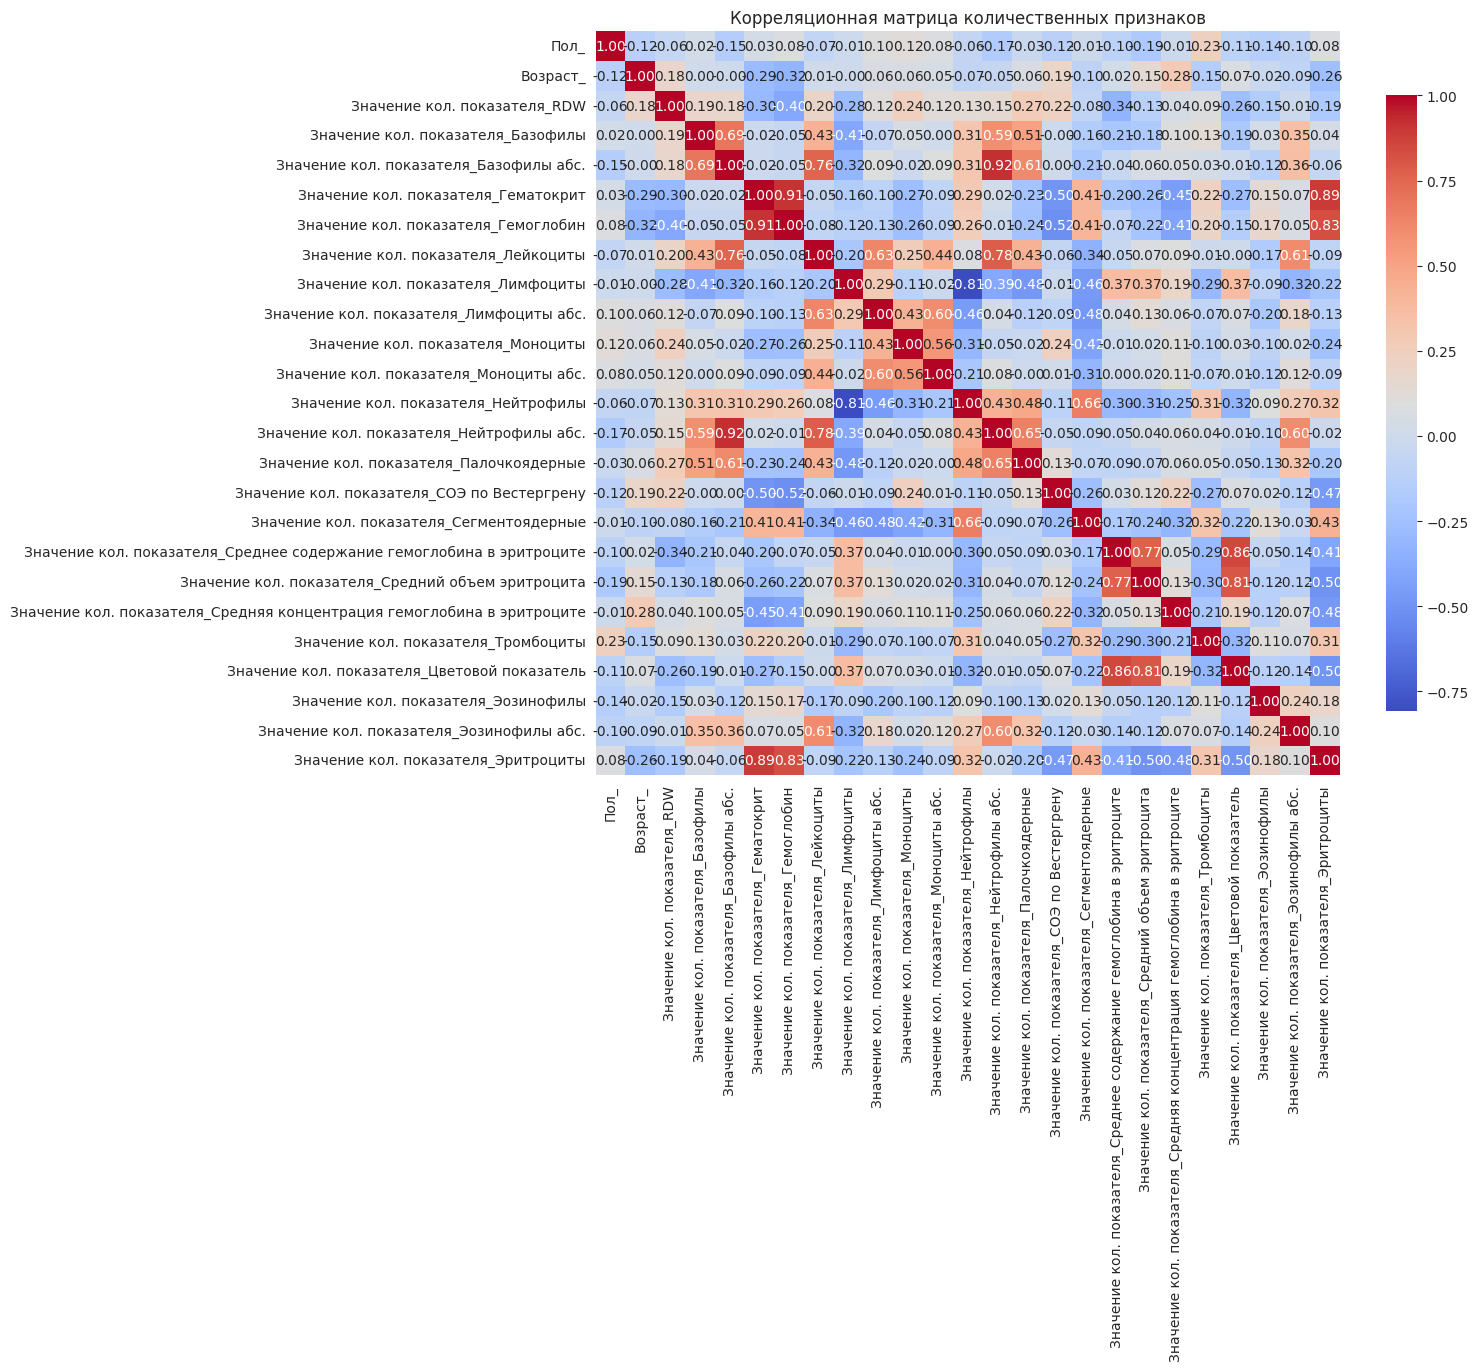

In [81]:
# Выбираем только количественные
numeric = df_final.select_dtypes(include=['number'])

# Считаем корреляционную матрицу
corr_matrix = numeric.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица количественных признаков')
plt.show()

Сомнительных корреляций не наблюдается.

## Финальный датасет

Формирование финального датасета.

In [82]:
df_final.describe()

Пол_    Возраст_  Значение кол. показателя_RDW  \
count  654.000000  654.000000                    654.000000   
mean     0.457187   65.120795                     15.902125   
std      0.498545   19.011863                      3.286630   
min      0.000000   10.000000                     10.320000   
25%      0.000000   55.000000                     13.880000   
50%      0.000000   70.000000                     15.300000   
75%      1.000000   77.000000                     17.315000   
max      1.000000   99.000000                     31.000000   

       Значение кол. показателя_Базофилы  \
count                         654.000000   
mean                            1.505443   
std                             1.853183   
min                             0.000000   
25%                             0.600000   
50%                             0.935000   
75%                             1.600000   
max                            13.700000   

       Значение кол. показателя_Базофилы абс.  \
count                              653.000000   
mean                                 0.410283   
std                                  1.549070   
min                                  0.000000   
25%                                  0.040000   
50%                                  0.060000   
75%                                  0.110000   
max                                  9.900000   

       Значение кол. показателя_Гематокрит  \
count                           654.000000   
mean                             37.901147   
std                               9.158999   
min                              11.000000   
25%                              33.850000   
50%                              39.000000   
75%                              43.995000   
max                              71.700000   

       Значение кол. показателя_Гемоглобин  \
count                           654.000000   
mean                            126.443869   
std                              30.155228   
min                              37.000000   
25%                             109.000000   
50%                             131.000000   
75%                             146.585000   
max                             211.000000   

       Значение кол. показателя_Лейкоциты  Значение кол. показателя_Лимфоциты  \
count                          654.000000                          654.000000   
mean                            13.719419                           32.770076   
std                             22.219167                           17.559654   
min                              0.100000                            2.600000   
25%                              5.510000                           21.225000   
50%                              8.070000                           29.100000   
75%                             10.807500                           41.200000   
max                            163.300000                           91.700000   

       Значение кол. показателя_Лимфоциты абс.  \
count                               654.000000   
mean                                  3.767630   
std                                   7.297285   
min                                   0.180000   
25%                                   1.410000   
50%                                   2.230000   
75%                                   3.227500   
max                                  57.800000   

       Значение кол. показателя_Моноциты  \
count                         654.000000   
mean                            8.058731   
std                             8.290966   
min                             0.400000   
25%                             3.870000   
50%                             6.125000   
75%                             8.800000   
max                            81.400000   

       Значение кол. показателя_Моноциты абс.  \
count                              653.000000   
mean                                 1.792848   
std                                 10.630871   
mi

In [83]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, 0 to 199
Data columns (total 28 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Осн. диаг. при выписке МКБ10 (текст)_                                   654 non-null    object 
 1   Пол_                                                                    654 non-null    int64  
 2   Возраст_                                                                654 non-null    int64  
 3   Значение кол. показателя_RDW                                            654 non-null    float64
 4   Значение кол. показателя_Базофилы                                       654 non-null    float64
 5   Значение кол. показателя_Базофилы абс.                                  653 non-null    float64
 6   Значение кол. показателя_Гематокрит                                     654 non-null   

In [84]:
# === FIX 1: корректное удаление дублей и полностью пустых строк ===
df_final = (
    df_final            # берём результирующий датасет
        .drop_duplicates()      # убираем дубли
        .dropna(how="all")      # если строка полностью NaN – убрать
        .reset_index(drop=True) # обновляем индексы
)
print("После очистки:", df_final.shape)


После очистки: (442, 28)


Так как у нас и так небольшая выборка, выбросы решили не удалять. Визуально результаты выглядят правомерно. А выбросы как раз могут указывать на отклонение от нормы у пациента.

# Модель

## Трансформация данных - кодирование категориальных прееменных, скейлинг

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
# Колонки для кодирования
categorical_cols = ["Осн. диаг. при выписке МКБ10 (текст)_", "Возраст_кат"]

# Создаем словарь энкодеров
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_final[col] = le.fit_transform(df_final[col].astype(str))
    encoders[col] = le

In [87]:
# Кодируем 'Риск' вручную
risk_mapping = {"Низкий": 0, "Средний": 1, "Высокий": 2}
df_final["Риск"] = df_final["Риск"].map(risk_mapping)

In [88]:
df_final

Осн. диаг. при выписке МКБ10 (текст)_  Пол_  Возраст_  \
0                                        2     1        87   
1                                        2     0        51   
2                                        2     1        86   
3                                        2     0        77   
4                                        2     1        73   
..                                     ...   ...       ...   
437                                      3     1        96   
438                                      3     1        32   
439                                      3     1        56   
440                                      3     1        85   
441                                      3     0        93   

     Значение кол. показателя_RDW  Значение кол. показателя_Базофилы  \
0                           21.30                               0.30   
1                           16.20                               1.60   
2                           17.00                               2.70   
3                           19.00                               2.00   
4                           15.60                               1.10   
..                            ...                                ...   
437                         10.73                               1.04   
438                         16.64                               1.06   
439                         17.15                               0.80   
440                         15.32                               1.28   
441                         14.02                               1.87   

     Значение кол. показателя_Базофилы абс.  \
0                                      0.00   
1                                      0.22   
2                                      0.15   
3                                      0.17   
4                                      0.06   
..                                      ...   
437                                    0.08   
438                                    0.05   
439                                    0.02   
440                                    0.09   
441                                    0.03   

     Значение кол. показателя_Гематокрит  Значение кол. показателя_Гемоглобин  \
0                                  26.30                                84.00   
1                                  48.50                               146.00   
2                                  40.00                               135.00   
3                                  17.00                                58.00   
4                                  28.30                               103.00   
..                                   ...                                  ...   
437                                43.43                               141.54   
438                                43.28                               157.65   
439                                43.64                               156.37   
440                                45.49                               140.75   
441                                40.11                               161.30   

     Значение кол. показателя_Лейкоциты  Значение кол. показателя_Лимфоциты  \
0                                 10.00                               13.10   
1                                 11.90                               20.90   
2                                  8.60                                9.00   
3                                  9.50                               19.40   
4                                  7.80                               24.00   
..                                  ...                                 ...   
437                                9.77                               18.62   
438                               10.42                               27.73   
439                               10.35                               31.08   
440                                9.43                            

In [89]:
# Разделим таблицу на X и y
X = df_final.drop('Риск', axis=1)
y = df_final['Риск']

In [90]:
# Заполняем пропуски в X
X = X.fillna(X.median())
display(X)

Осн. диаг. при выписке МКБ10 (текст)_  Пол_  Возраст_  \
0                                        2     1        87   
1                                        2     0        51   
2                                        2     1        86   
3                                        2     0        77   
4                                        2     1        73   
..                                     ...   ...       ...   
437                                      3     1        96   
438                                      3     1        32   
439                                      3     1        56   
440                                      3     1        85   
441                                      3     0        93   

     Значение кол. показателя_RDW  Значение кол. показателя_Базофилы  \
0                           21.30                               0.30   
1                           16.20                               1.60   
2                           17.00                               2.70   
3                           19.00                               2.00   
4                           15.60                               1.10   
..                            ...                                ...   
437                         10.73                               1.04   
438                         16.64                               1.06   
439                         17.15                               0.80   
440                         15.32                               1.28   
441                         14.02                               1.87   

     Значение кол. показателя_Базофилы абс.  \
0                                      0.00   
1                                      0.22   
2                                      0.15   
3                                      0.17   
4                                      0.06   
..                                      ...   
437                                    0.08   
438                                    0.05   
439                                    0.02   
440                                    0.09   
441                                    0.03   

     Значение кол. показателя_Гематокрит  Значение кол. показателя_Гемоглобин  \
0                                  26.30                                84.00   
1                                  48.50                               146.00   
2                                  40.00                               135.00   
3                                  17.00                                58.00   
4                                  28.30                               103.00   
..                                   ...                                  ...   
437                                43.43                               141.54   
438                                43.28                               157.65   
439                                43.64                               156.37   
440                                45.49                               140.75   
441                                40.11                               161.30   

     Значение кол. показателя_Лейкоциты  Значение кол. показателя_Лимфоциты  \
0                                 10.00                               13.10   
1                                 11.90                               20.90   
2                                  8.60                                9.00   
3                                  9.50                               19.40   
4                                  7.80                               24.00   
..                                  ...                                 ...   
437                                9.77                               18.62   
438                               10.42                               27.73   
439                               10.35                               31.08   
440                                9.43                            

In [91]:
np.savetxt("feature_order.txt", X.columns.values, fmt="%s")

Разделяем данные на тренировочные и тестовые

In [92]:
# Используем метод главных компонент для совмещения высоких корреляций
from sklearn.model_selection import train_test_split

In [93]:
# Разделяем данные на тренировочные и тестовые (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Посмотрим на баланс классов в выборках
print(f"Размер тренировочных данных: {X_train.shape[0]} строк")
print(f"Размер тестовых данных: {X_test.shape[0]} строк")
print()
print(f"Баланс классов в тренировочной выборке:\n{y_train.value_counts(normalize=True)}")
print()

Размер тренировочных данных: 309 строк
Размер тестовых данных: 133 строк

Баланс классов в тренировочной выборке:
Риск
2    0.514563
0    0.453074
1    0.032362
Name: proportion, dtype: float64



## Стандартизация данных

In [94]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [95]:
# Стандартизация
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# Трансформация
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
np.save("scaler_mean.npy", scaler.mean_)
np.save("scaler_scale.npy", scaler.scale_)

In [97]:
# Импорт метрик
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

## Моделирование - Простейшая неросеть Keras Tensorflow

In [1]:
!pip install tensorflow

In [124]:
import tensorflow as tf

In [125]:
tf.__version__

'2.18.0'

In [126]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

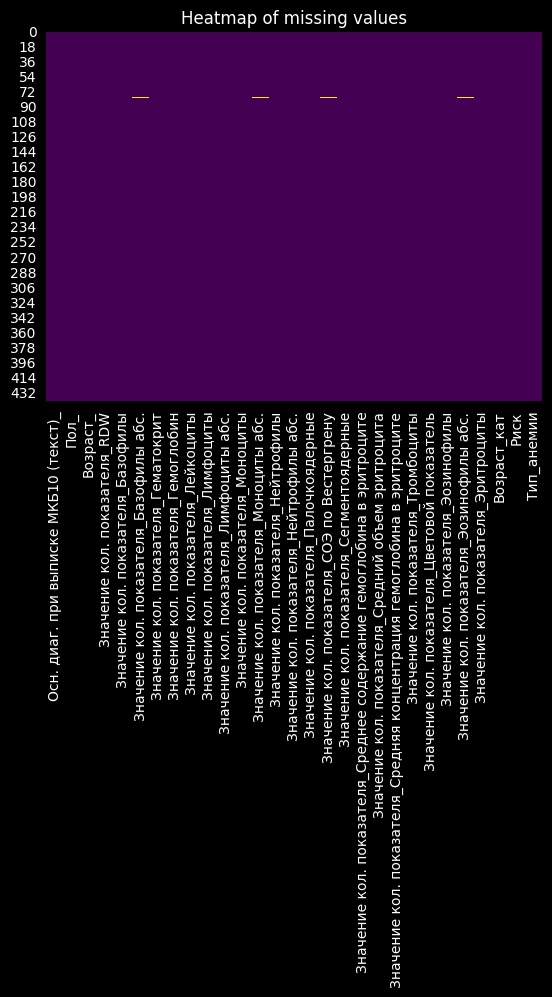

In [127]:
# Визуализируем пропуски на всякий случай
sns.heatmap(df_final.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of missing values")
plt.show()

In [128]:
# Проверим данные
print("NaN в X_train:", np.isnan(X_train).any())
print("Минимум/Максимум X_train:", X_train.min(), X_train.max())

NaN в X_train: False
Минимум/Максимум X_train: -3.855348821167155 17.487024525623784


In [129]:
# Заполняем NaN средним значением столбца
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train_filled = imputer.fit_transform(X_train)

# Проверяем результат
print("NaN после заполнения:", np.isnan(X_train_filled).any())

NaN после заполнения: False


In [147]:
from sklearn.preprocessing import StandardScaler

scaler_x_train_filled = StandardScaler()
X_train_filled_scaled = scaler_x_train_filled.fit_transform(X_train_filled)

In [149]:
from tensorflow.keras.regularizers import l1_l2
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_filled_scaled.shape[1],),kernel_regularizer=l1_l2(l1=0.005, l2=0.02))) #Попробуем добавить регуляризацию l1+l2
model.add(BatchNormalization())
model.add(Dropout(0.55)) #Усилим до 0.55
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [150]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,475 (162.01 KB)

 Trainable params: 40,963 (160.01 KB)

 Non-trainable params: 512 (2.00 KB)

In [151]:
recall_metric = Recall()

def recall_m(y_true, y_pred):
    y_pred_classes = tf.argmax(y_pred, axis=1)
    recall_metric.reset_state()
    recall_metric.update_state(y_true, y_pred_classes)
    return recall_metric.result()

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy', recall_m]
)

In [108]:
# history = model.fit(
#     X_train_filled_scaled,
#     y_train,
#     epochs=20,
#     validation_split=0.2,
#     verbose=1
# )

In [152]:
# Bзвешивание классов + ранняя остановка
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

class_weights = dict(
        enumerate(
            compute_class_weight(
                class_weight="balanced",
                classes=np.unique(y_train),
                y=y_train
            )
        )
)

callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint("best_leukemia_model.keras", monitor="val_loss", save_best_only=True)
]

history = model.fit(
    X_train_filled_scaled,
    y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=callbacks,
    class_weight=class_weights,
    verbose=1
)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 285ms/step - accuracy: 0.3660 - loss: 4.7070 - recall_m: 0.8082 - val_accuracy: 0.7258 - val_loss: 4.2498 - val_recall_m: 0.9174
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7594 - loss: 3.8636 - recall_m: 0.8962 - val_accuracy: 0.9032 - val_loss: 3.9432 - val_recall_m: 0.9118
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9401 - loss: 3.3982 - recall_m: 0.9623 - val_accuracy: 0.9194 - val_loss: 3.7276 - val_recall_m: 0.9118
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9112 - loss: 3.2702 - recall_m: 0.9023 - val_accuracy: 0.9194 - val_loss: 3.5486 - val_recall_m: 0.9118
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9515 - loss: 3.0644 - recall_m: 0.9564 - val_accuracy: 0.9355 - val_loss: 3.4007 - val_recall_m: 0.9412
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9564 - loss: 3.0698 - recall_m: 0.9733 - val_accuracy: 0.9516 - val_loss: 3.2828 - val_recall_m

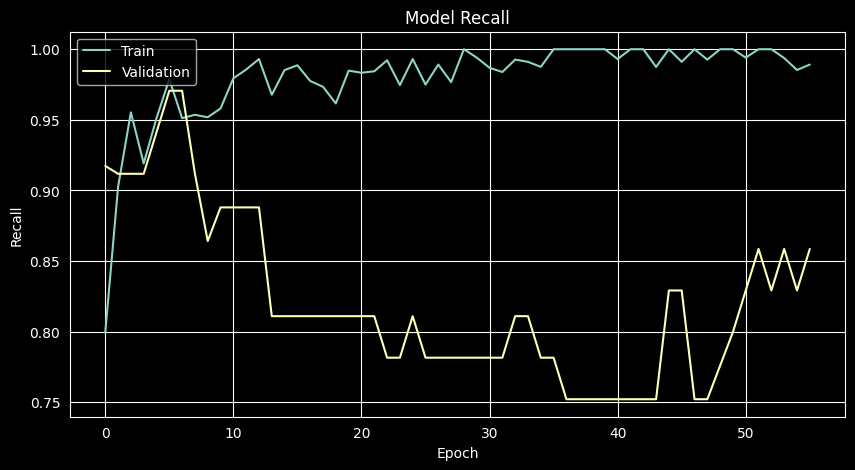

In [153]:
# Визуализация обучения модели по Recall
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

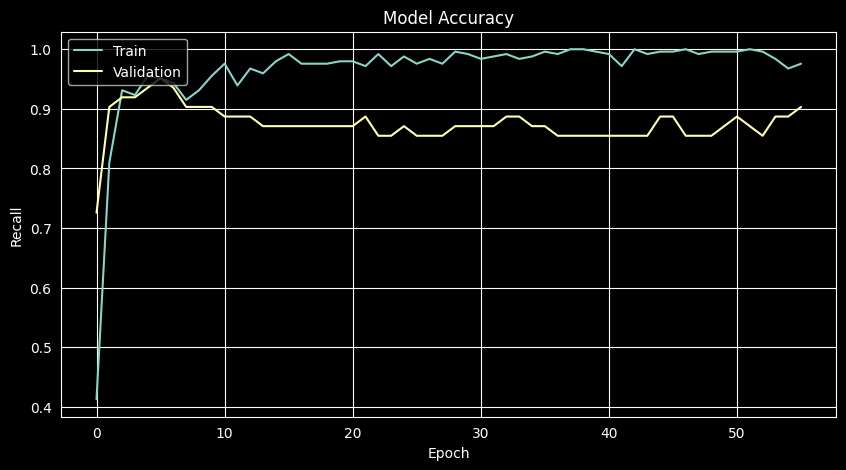

In [154]:
# Визуализация обучения модели по Accuracy
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

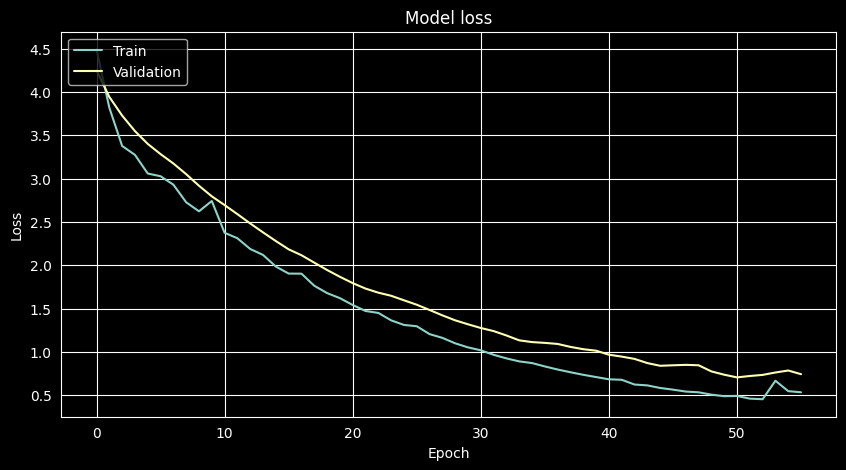

In [155]:
# Визуализация функции потерь при обучении
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [156]:
# Предсказание вероятностей классов
y_pred_proba = model.predict(X_test)

# Преобразование вероятностей в предсказанные классы
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Сравнение предсказанных и реальных данных
results = pd.DataFrame({
    'Реальные': y_test,
    'Предсказанные': y_pred_classes
})

print(results)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
     Реальные  Предсказанные
393         0              0
371         0              0
111         2              2
127         2              2
95          2              2
..        ...            ...
430         0              0
423         0              0
316         0              0
123         2              2
427         0              0

[133 rows x 2 columns]


Accuracy: 0.9398
Recall: 0.9608


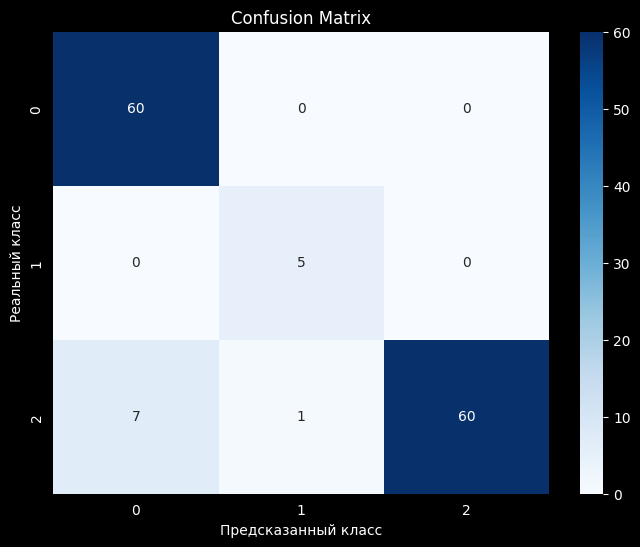

In [157]:
# Подсчет метрик на предсказанных результатах
accuracy = accuracy_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes, average='macro')  # macro = равный вес классам

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred_classes)

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Предсказанный класс")
plt.ylabel("Реальный класс")
plt.show()

In [143]:
np.save("feature_medians.npy", X.median().values)

In [144]:
# Сохранение финальной модели
model.save('leukemia_model.keras', include_optimizer=False)

In [117]:
!pip install ray[serve]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.5/201.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.1/453.1 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.8/459.8 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.

In [118]:
from ray import serve
from starlette.requests import Request
from typing import Dict
import numpy as np
import tensorflow as tf


@serve.deployment
class LeukemiaModel:
    def __init__(self, model_path: str = "leukemia_model.keras"):
        self.model_path = model_path
        self.model = tf.keras.models.load_model(model_path)
        # Определяем входную форму (без batch_size)
        self.input_shape = self.model.input_shape[1:]

    async def __call__(self, starlette_request: Request) -> Dict:
        # Получаем входные данные
        input_array = np.array((await starlette_request.json())["array"])
        reshaped_array = input_array.reshape((1, *self.input_shape))

        # Прогноз
        prediction = self.model.predict(reshaped_array)

        return {
            "prediction": prediction.tolist(),
            "file": self.model_path
        }

## Анемические показатели для облачного сервиса

In [119]:
df_final

Осн. диаг. при выписке МКБ10 (текст)_  Пол_  Возраст_  \
0                                        2     1        87   
1                                        2     0        51   
2                                        2     1        86   
3                                        2     0        77   
4                                        2     1        73   
..                                     ...   ...       ...   
437                                      3     1        96   
438                                      3     1        32   
439                                      3     1        56   
440                                      3     1        85   
441                                      3     0        93   

     Значение кол. показателя_RDW  Значение кол. показателя_Базофилы  \
0                           21.30                               0.30   
1                           16.20                               1.60   
2                           17.00                               2.70   
3                           19.00                               2.00   
4                           15.60                               1.10   
..                            ...                                ...   
437                         10.73                               1.04   
438                         16.64                               1.06   
439                         17.15                               0.80   
440                         15.32                               1.28   
441                         14.02                               1.87   

     Значение кол. показателя_Базофилы абс.  \
0                                      0.00   
1                                      0.22   
2                                      0.15   
3                                      0.17   
4                                      0.06   
..                                      ...   
437                                    0.08   
438                                    0.05   
439                                    0.02   
440                                    0.09   
441                                    0.03   

     Значение кол. показателя_Гематокрит  Значение кол. показателя_Гемоглобин  \
0                                  26.30                                84.00   
1                                  48.50                               146.00   
2                                  40.00                               135.00   
3                                  17.00                                58.00   
4                                  28.30                               103.00   
..                                   ...                                  ...   
437                                43.43                               141.54   
438                                43.28                               157.65   
439                                43.64                               156.37   
440                                45.49                               140.75   
441                                40.11                               161.30   

     Значение кол. показателя_Лейкоциты  Значение кол. показателя_Лимфоциты  \
0                                 10.00                               13.10   
1                                 11.90                               20.90   
2                                  8.60                                9.00   
3                                  9.50                               19.40   
4                                  7.80                               24.00   
..                                  ...                                 ...   
437                                9.77                               18.62   
438                               10.42                               27.73   
439                               10.35                               31.08   
440                                9.43                            

In [120]:
def classify_anemia(row):
    gender = row['Пол_']
    hb = row['Значение кол. показателя_Гемоглобин']
    mch = row['Значение кол. показателя_Среднее содержание гемоглобина в эритроците']
    mcv = row['Значение кол. показателя_Средний объем эритроцита']
    mchc = row['Значение кол. показателя_Средняя концентрация гемоглобина в эритроците']

    # Проверка на анемию (пониженный гемоглобин)
    if gender == 0:  # Мужчины
        # Определение степени тяжести
        if hb >= 130:
            return 'Нет анемии'
        elif 100 <= hb < 130:
            severity = 'Легкая'
        elif 80 <= hb < 100:
            severity = 'Средняя'
        else:
            severity = 'Тяжелая'
    else:  # Женщины
        # Определение степени тяжести
        if hb >= 120:
            return 'Нет анемии'
        elif 90 <= hb < 120:
            severity = 'Легкая'
        elif 70 <= hb < 90:
            severity = 'Средняя'
        else:
            severity = 'Тяжелая'

    # Железодефицитная анемия (микроцитарная гипохромная)
    if mcv < 80 and mch < 27 and mchc < 300:
        return f'Железодефицитная анемия ({severity})'

    # В12-дефицитная или фолиеводефицитная анемия или гемолитическая (макроцитарная)
    elif mcv > 100 and mch > 34 and mchc > 380:
        return f'Мегалобластная анемия (B12/фолиеводефицитная) или гемолитическая анемия ({severity})'

    # Анемии при опухолевых заболеваниях (нормоцитарная нормохромная)
    elif 80 <= mcv <= 100 and 27 <= mch <= 34 and 300 <= mchc <= 380:
        return f'Анемии при опухолевых заболеваниях ({severity})'

    # Анемия хронических заболеваний (нормоцитарная нормохромная или микроцитарная)
    else:
        return f'Анемия хронических заболеваний ({severity})'

In [121]:
df_final['Тип_анемии'] = df_final.apply(classify_anemia, axis=1)

In [122]:
df_final

Осн. диаг. при выписке МКБ10 (текст)_  Пол_  Возраст_  \
0                                        2     1        87   
1                                        2     0        51   
2                                        2     1        86   
3                                        2     0        77   
4                                        2     1        73   
..                                     ...   ...       ...   
437                                      3     1        96   
438                                      3     1        32   
439                                      3     1        56   
440                                      3     1        85   
441                                      3     0        93   

     Значение кол. показателя_RDW  Значение кол. показателя_Базофилы  \
0                           21.30                               0.30   
1                           16.20                               1.60   
2                           17.00                               2.70   
3                           19.00                               2.00   
4                           15.60                               1.10   
..                            ...                                ...   
437                         10.73                               1.04   
438                         16.64                               1.06   
439                         17.15                               0.80   
440                         15.32                               1.28   
441                         14.02                               1.87   

     Значение кол. показателя_Базофилы абс.  \
0                                      0.00   
1                                      0.22   
2                                      0.15   
3                                      0.17   
4                                      0.06   
..                                      ...   
437                                    0.08   
438                                    0.05   
439                                    0.02   
440                                    0.09   
441                                    0.03   

     Значение кол. показателя_Гематокрит  Значение кол. показателя_Гемоглобин  \
0                                  26.30                                84.00   
1                                  48.50                               146.00   
2                                  40.00                               135.00   
3                                  17.00                                58.00   
4                                  28.30                               103.00   
..                                   ...                                  ...   
437                                43.43                               141.54   
438                                43.28                               157.65   
439                                43.64                               156.37   
440                                45.49                               140.75   
441                                40.11                               161.30   

     Значение кол. показателя_Лейкоциты  Значение кол. показателя_Лимфоциты  \
0                                 10.00                               13.10   
1                                 11.90                               20.90   
2                                  8.60                                9.00   
3                                  9.50                               19.40   
4                                  7.80                               24.00   
..                                  ...                                 ...   
437                                9.77                               18.62   
438                               10.42                               27.73   
439                               10.35                               31.08   
440                                9.43                            

## Pipeline для входных данных облачного сервиса

Здесь представлен код Pipeline, который загружает обученную модель нейронной сети, предобрабатывает данные пациентов, делает предсказания о риске лейкемии и выдает медицинские рекомендации.

In [123]:
# import tensorflow as tf
# import numpy as np
# from sklearn.preprocessing import LabelEncoder, StandardScaler


# def age_to_category(age):
#     """Преобразует возраст в категории."""
#     if age <= 14:
#         return "Дети"
#     elif age <= 39:
#         return "Молодые"
#     elif age <= 59:
#         return "Взрослые"
#     else:
#         return "Пожилые"


# def gender_to_numeric(gender):
#     """Преобразует пол: 0 для М, 1 для Ж."""
#     if isinstance(gender, str):
#         gender = gender.strip().upper()
#         return 0 if gender in ["М", "M", "MALE"] else 1
#     return int(gender)


# class LeukemiaPipeline:
#     """Пайплайн для предсказания риска лейкемии."""

#     def __init__(self, model_path="/content/leukemia_model.keras"):  # Исправлено: __init__
#         self.model = tf.keras.models.load_model(model_path)
#         self.label_encoder = LabelEncoder()
#         self.scaler = StandardScaler()
#         self.label_encoder.fit(["Дети", "Молодые", "Взрослые", "Пожилые"])

#         self.recommendations = {
#             0: "Рекомендована диспансеризация в течение года",
#             1: "Рекомендуется обратиться к терапевту/гематологу в ближайший месяц",
#             2: "Срочно обратитесь к терапевту/гематологу"
#         }

#     def preprocess(self, df):
#         """Предобработка данных."""
#         df_copy = df.copy()

#         # Преобразуем пол
#         if "Пол" in df_copy.columns:
#             df_copy["Пол"] = df_copy["Пол"].apply(gender_to_numeric)

#         # Преобразуем возраст в категорию
#         df_copy["Возраст_кат"] = df_copy["Возраст"].apply(age_to_category)
#         df_copy["Возраст_кат"] = self.label_encoder.transform(df_copy["Возраст_кат"])

#         features = df_copy.drop(columns=["Target"]) if "Target" in df_copy.columns else df_copy
#         scaled_features = self.scaler.fit_transform(features)
#         return scaled_features

#     def predict(self, df):
#         """Делает предсказания и возвращает рекомендации."""
#         X = self.preprocess(df)
#         preds = self.model.predict(X)
#         class_preds = np.argmax(preds, axis=1)
#         recommendations = [self.recommendations[p] for p in class_preds]
#         return list(zip(class_preds, recommendations))

# Выводы

Выражаем благодарность компании Наносемантика, Skillfactory и ФГАОУ ВО Первый МГМУ им. И.М. Сеченова Минздрава России (Сеченовский Университет) за интересный проект.

Над ним работами 6 специалистов:

тимлид - Анастасия Чухонцева (врач-педиатр),

Анастасия Шнырева - генетик,

Татьяна Ермакова - врач-педиатр,

Максим Ушаков - врач - терапевт,

Елена Платонова - врач-кардиолог,

Виталий Хижа - биохимик, научный сотрудник.

По ходу работы над проектом была получена консультация специалиста онко-гематолога из Ольденбургской университетской клиники для уточнения практических вопросов.


Для работы над проектом был предоставлен датасет, содержащий результаты клинического анализа крови пациентов с лейкозами. После подробного изучения данных, клинических рекомендаций на тему лейкемий, консультации со специалистом, было принято коллегиальное решение о модификации технического задания ввиду невозможности на данных, являющихся патологией крови, построить модель для здоровой популяции, что противоречило бы базовым принципам фундаментальных медицинских наук. Решено построить прогностическую модель для выявления и мониторинга рецидивов у лейкемических больных, что имеело бы высокую практическую ценность для пациентов данной категории, а также среди врачей всех дисциплин, ввиду высокой онкологической настороженности.

Во время разведывательного анализа данных мы столкнулись еще с одной проблемой - малой выборкой пациентов, а после группирования - с огромной разницей в категориях срочности обращения к врачу (высокой и умеренной), еще раз повторим, что нормы представленно не было, и в данном датасете не рассматриваются пациенты без патологии крови. Сначала с помощью синтеза данных с добавлением шума мы пробовали увеличить их количество, но отказались от этого способа в пользу балансировки без искажения лабораторных значений. Сформировали финальный датасет.

На базе этого финального датасета совершались подбор и тестирование моделей.

Использовались следующие модели с метриками:

Тестирование каждой модели с уменьшением размерности данных и без (Метод главных компонент (PCA))

1. Случайный лес с оптимизацией гиперпараметров (RandomForestClassifier) (accurancy=0.853, recall=0.853)

2. Категориальный градиентный бустинг (CatBoost)
(accurancy=0.989, recall=0.989)

3. Нейронная сеть TensorFlow

Лучший результат показала нейронная сеть TensorFlow (accurancy=0.977, recall=0.985).

Код к моделям  категориального градиентного бустинга и случайного леса с оптимизацией гиперпараметров- тут https://github.com/Anastasia-genetics/Leukemia_project_hackaton/blob/master/leukemia_raw_models.ipynb


Исходя из проделанной работы, можем дать следующие рекомендации:

1. Для более точной работы модели необходимо увеличение выборки реальных анализов крови лейкемических больных.

2. Для получения среза лабораторных показателей всей популяции необходимо включить в выборку здоровых пациентов и разные возрастные категории.